In [1]:
import pandas as pd
outDir = '/vsc-hard-mounts/leuven-data/346/vsc34647/jupyterhub_notebooks/scATAC/'
tmpDir = '/staging/leuven/stg_00002/lcb/lcervenkova/tmp/'

In [2]:
import os
os.chdir('/vsc-hard-mounts/leuven-data/346/vsc34647/jupyterhub_notebooks/scATAC')
os.getcwd()

'/vsc-hard-mounts/leuven-data/346/vsc34647/jupyterhub_notebooks/scATAC'

In [3]:
# Load cisTopic object
import pickle
infile = open(outDir + 'CROP_multiome_cisTopicObject_noDBL.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

In [3]:
# Load models
from pycisTopic.lda_models import *

import pickle
infile = open(outDir + 'CROP_multiome_models_500_iter_noDBL.pkl', 'rb')
models = pickle.load(infile)
infile.close()

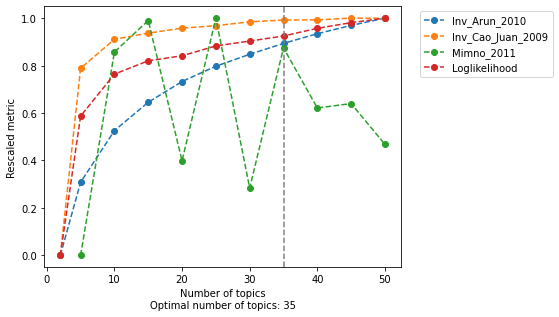

In [7]:
model=evaluate_models(models,
                     select_model=35, 
                     return_model=True, 
                     metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                     plot_metrics=False,
                     save= outDir + 'models/model_selection.pdf')
# Add model to cisTopicObject
cistopic_obj.add_LDA_model(model)
# Save
with open(outDir + 'CROP_multiome_cisTopicObject_noDBL.pkl', 'wb') as f:
    pickle.dump(cistopic_obj, f)

# Visualizing scATAC data

In [15]:
from pycisTopic.clust_vis import *
find_clusters(cistopic_obj,
                 target  = 'cell',
                 k = 10,
                 res = [0.6, 1.2], 
                 prefix = 'pycisTopic_', 
                 scale = True,
                 split_pattern = '-')

2022-06-20 14:41:17,142 cisTopic     INFO     Finding neighbours
Columns ['pycisTopic_leiden_10_0.6'] will be overwritten
Columns ['pycisTopic_leiden_10_1.2'] will be overwritten


In [16]:
run_umap(cistopic_obj,
                 target  = 'cell', scale=True)

2022-06-20 14:41:21,697 cisTopic     INFO     Running UMAP


In [19]:
cistopic_obj.cell_data.head()

nFeature_RNA  seurat_clusters  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi           NaN              NaN   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi           NaN              NaN   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi           NaN              NaN   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi           NaN              NaN   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi           NaN              NaN   

                                       Log_unique_nr_frag  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            3.773421   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            3.889134   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi            4.351255   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            4.451541   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi            4.241571   

                                      cisTopic_log_nr_frag  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi             3.478999   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi             3.588496   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi              3.97488   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi             4.216087   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi             3.990783   

                                                  barcode  Unique_nr_frag  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi  ATTGCTCGTCACCAAA-1            5935   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi  GGCGTTATCAAAGGCA-1            7747   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi  TATCACAAGACAGGTA-1           22452   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi  CCTGTTGGTGCGCATG-1           28284   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi  GTATTGCAGGTTAGAG-1           17441   

                                       Total_nr_frag_in_regions  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi                      3680   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi                      4778   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi                     12460   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi                     22172   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi                     13128   

                                       RNA_snn_res.0.4  Total_nr_frag  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi              NaN           6804   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi              NaN           8912   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi              NaN          26387   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi              NaN          34780   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi              NaN          21323   

                                      orig.ident  ...  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi        NaN  ...   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi        NaN  ...   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi        NaN  ...   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi        NaN  ...   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi        NaN  ...   

                                      Unique_nr_frag_in_regions  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi                      3013   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi                      3877   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi                      9438   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi                     16447   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi                      9790   

                                       cisTopic_log_nr_acc  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi             3.444669   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi             3.553762   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi             3.905742   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi             4.123688   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi             3.926754   

                                      Seurat_RNA+ATAC_leiden_100_2  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi                          158   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi                           14   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi                            3   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi                           10   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi                          NaN   

                     

In [10]:
run_tsne(cistopic_obj,
                 target  = 'cell', scale=True)

2022-03-18 15:35:22,423 cisTopic     INFO     Running FItSNE
Will use momentum during exaggeration phase
Computing input similarities...
Using perplexity, so normalizing input data (to prevent numerical problems)
Using perplexity, not the manually set kernel width.  K (number of nearest neighbors) and sigma (bandwidth) parameters are going to be ignored.
Using ANNOY for knn search, with parameters: n_trees 50 and search_k 4500
Going to allocate memory. N: 14071, K: 90, N*K = 1266390
Building Annoy tree...
Done building tree. Beginning nearest neighbor search... 
parallel (36 threads):


Get mcf7 and mm087 predicted by freemuxlet and add new column to cistopic_obj.cell_data

In [20]:
with open(outDir + 'mcf7_barcodes.txt') as file:
    mcf7_barcodes = [line.rstrip() for line in file]
    
with open(outDir + 'mm087_barcodes.txt') as file:
    mm087_barcodes = [line.rstrip() for line in file]

In [24]:
# create a list of our conditions
conditions = [
    (cistopic_obj.cell_data['barcode'].isin(mcf7_barcodes)),
    (cistopic_obj.cell_data['barcode'].isin(mm087_barcodes)),
    (~(cistopic_obj.cell_data['barcode'].isin(mcf7_barcodes)) & ~(cistopic_obj.cell_data['barcode'].isin(mm087_barcodes)))
    ]

# create a list of the values we want to assign for each condition
values = ['MCF7', 'MM087', 'others']

# create a new column and use np.select to assign values to it using our lists as arguments
cistopic_obj.cell_data['cell line'] = np.select(conditions, values)

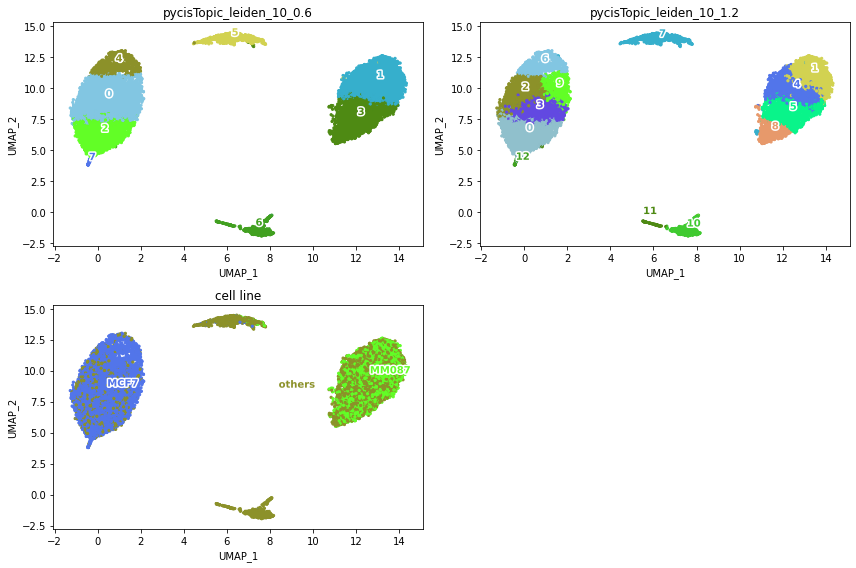

In [28]:
plot_metadata(cistopic_obj,
                 reduction_name='UMAP',
                 variables=['pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'cell line'], # Labels from RNA and new clusters
                 target='cell', num_columns=2,
                 text_size=10,
                 dot_size=5,
                 figsize=(12,8),
                 save= outDir + 'visualization/dimensionality_reduction_label.pdf')

In [20]:
cistopic_obj.projections['cell']

{'UMAP':                                           UMAP_1     UMAP_2
 ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi  -4.034736   9.447587
 GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi  -2.672077  10.820182
 TATCACAAGACAGGTA-1-CRM_CROP_seq_multi  -2.997577  12.444247
 CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi  10.529401   7.253916
 GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi   5.667615  14.222758
 ...                                          ...        ...
 GCCGTGAGTTGAGCCG-1-CRM_CROP_seq_multi  -3.706995   9.646070
 TGCTTCATCCATTACT-1-CRM_CROP_seq_multi  11.807982  11.275507
 GGTATGTTCTCAATGA-1-CRM_CROP_seq_multi  -3.726345   8.459033
 TGTTGGCCACAGAACG-1-CRM_CROP_seq_multi  -2.739936   9.062030
 TTATTGCTCCTTGAGG-1-CRM_CROP_seq_multi  -3.212837   6.852681
 
 [14071 rows x 2 columns],
 'tSNE':                                           tSNE_1     tSNE_2
 ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi -20.903862 -17.721847
 GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi -24.832448 -35.590674
 TATCACAAGACAGGTA-1-CRM_CROP_seq_multi -

In [5]:
cistopic_obj.cell_data['barcode'] = cistopic_obj.cell_data.apply(lambda row: row.barcode + '-1', axis=1)
cistopic_obj.cell_data.head()

Unique_nr_frag  Dupl_rate  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            5935   0.127719   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            7747   0.130723   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi           22452   0.149126   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi           28284   0.186774   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi           17441   0.182057   

                                      cisTopic_nr_frag             barcode  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi             3013  ATTGCTCGTCACCAAA-1   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi             3877  GGCGTTATCAAAGGCA-1   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi             9438  TATCACAAGACAGGTA-1   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            16447  CCTGTTGGTGCGCATG-1   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi             9790  GTATTGCAGGTTAGAG-1   

                                       Total_nr_frag cisTopic_log_nr_frag  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi           6804             3.478999   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi           8912             3.588496   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi          26387              3.97488   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi          34780             4.216087   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi          21323             3.990783   

                                       Log_unique_nr_frag           sample_id  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            3.773421  CRM_CROP_seq_multi   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            3.889134  CRM_CROP_seq_multi   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi            4.351255  CRM_CROP_seq_multi   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            4.451541  CRM_CROP_seq_multi   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi            4.241571  CRM_CROP_seq_multi   

                                      cisTopic_log_nr_acc  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            3.444669   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            3.553762   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi            3.905742   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            4.123688   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi            3.926754   

                                       Unique_nr_frag_in_regions  ...  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi                       3013  ...   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi                       3877  ...   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi                       9438  ...   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi                      16447  ...   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi                       9790  ...   

                                       Total_nr_frag_in_regions  orig.ident  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi                      3680         NaN   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi                      4778         NaN   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi                     12460         NaN   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi                     22172         NaN   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi                     13128         NaN   

                                      nCount_RNA  nFeature_RNA  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi        NaN           NaN   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi        NaN           NaN   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi        NaN           NaN   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi        NaN           NaN   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi        NaN           NaN   

                                       RNA_snn_res.0.4  seurat_clusters  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi              NaN              NaN   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi              NaN              NaN   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi              NaN              NaN   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi              NaN              NaN   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi              NaN              NaN   

                                      pycisTopic_leiden_10_0.6  \
ATTGCTCGTCACCAAA

In [6]:
def get_cell_type(row):
    if row['pycisTopic_leiden_10_0.6'] == '0' or row['pycisTopic_leiden_10_0.6'] == '2' or row['pycisTopic_leiden_10_0.6'] == '4' or row['pycisTopic_leiden_10_0.6'] == '7':
        val = 'MCF7'
    elif row['pycisTopic_leiden_10_0.6'] == '1' or row['pycisTopic_leiden_10_0.6'] == '3':
        val = 'MM087'
    else:
        val = 'others'
    return val

cistopic_obj.cell_data['cell type'] = cistopic_obj.cell_data.apply(get_cell_type, axis=1)

cistopic_obj.cell_data.head()

Unique_nr_frag  Dupl_rate  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            5935   0.127719   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            7747   0.130723   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi           22452   0.149126   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi           28284   0.186774   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi           17441   0.182057   

                                      cisTopic_nr_frag             barcode  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi             3013  ATTGCTCGTCACCAAA-1   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi             3877  GGCGTTATCAAAGGCA-1   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi             9438  TATCACAAGACAGGTA-1   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            16447  CCTGTTGGTGCGCATG-1   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi             9790  GTATTGCAGGTTAGAG-1   

                                       Total_nr_frag cisTopic_log_nr_frag  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi           6804             3.478999   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi           8912             3.588496   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi          26387              3.97488   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi          34780             4.216087   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi          21323             3.990783   

                                       Log_unique_nr_frag           sample_id  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            3.773421  CRM_CROP_seq_multi   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            3.889134  CRM_CROP_seq_multi   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi            4.351255  CRM_CROP_seq_multi   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            4.451541  CRM_CROP_seq_multi   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi            4.241571  CRM_CROP_seq_multi   

                                      cisTopic_log_nr_acc  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            3.444669   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            3.553762   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi            3.905742   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            4.123688   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi            3.926754   

                                       Unique_nr_frag_in_regions  ...  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi                       3013  ...   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi                       3877  ...   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi                       9438  ...   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi                      16447  ...   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi                       9790  ...   

                                       orig.ident  nCount_RNA nFeature_RNA  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi         NaN         NaN          NaN   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi         NaN         NaN          NaN   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi         NaN         NaN          NaN   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi         NaN         NaN          NaN   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi         NaN         NaN          NaN   

                                       RNA_snn_res.0.4  seurat_clusters  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi              NaN              NaN   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi              NaN              NaN   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi              NaN              NaN   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi              NaN              NaN   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi              NaN              NaN   

                                       pycisTopic_leiden_10_0.6  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi                         0   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi                         0   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi                         4   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi                         3   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi                         5   

                                      pycisTopic_leiden_10_1.2  cell line  \
ATTGC

In [7]:
cistopic_obj.cell_data = cistopic_obj.cell_data.drop('cell line', 1)
cistopic_obj.cell_data.head()

/tmp/ipykernel_27155/2242975064.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cistopic_obj.cell_data = cistopic_obj.cell_data.drop('cell line', 1)


Unique_nr_frag  Dupl_rate  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            5935   0.127719   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            7747   0.130723   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi           22452   0.149126   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi           28284   0.186774   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi           17441   0.182057   

                                      cisTopic_nr_frag             barcode  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi             3013  ATTGCTCGTCACCAAA-1   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi             3877  GGCGTTATCAAAGGCA-1   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi             9438  TATCACAAGACAGGTA-1   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            16447  CCTGTTGGTGCGCATG-1   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi             9790  GTATTGCAGGTTAGAG-1   

                                       Total_nr_frag cisTopic_log_nr_frag  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi           6804             3.478999   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi           8912             3.588496   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi          26387              3.97488   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi          34780             4.216087   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi          21323             3.990783   

                                       Log_unique_nr_frag           sample_id  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            3.773421  CRM_CROP_seq_multi   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            3.889134  CRM_CROP_seq_multi   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi            4.351255  CRM_CROP_seq_multi   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            4.451541  CRM_CROP_seq_multi   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi            4.241571  CRM_CROP_seq_multi   

                                      cisTopic_log_nr_acc  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            3.444669   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            3.553762   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi            3.905742   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            4.123688   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi            3.926754   

                                       Unique_nr_frag_in_regions  ...  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi                       3013  ...   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi                       3877  ...   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi                       9438  ...   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi                      16447  ...   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi                       9790  ...   

                                       Total_nr_frag_in_regions  orig.ident  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi                      3680         NaN   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi                      4778         NaN   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi                     12460         NaN   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi                     22172         NaN   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi                     13128         NaN   

                                      nCount_RNA  nFeature_RNA  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi        NaN           NaN   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi        NaN           NaN   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi        NaN           NaN   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi        NaN           NaN   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi        NaN           NaN   

                                       RNA_snn_res.0.4  seurat_clusters  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi              NaN              NaN   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi              NaN              NaN   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi              NaN              NaN   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi              NaN              NaN   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi              NaN              NaN   

                                      pycisTopic_leiden_10_0.6  \
ATTGCTCGTCACCAAA

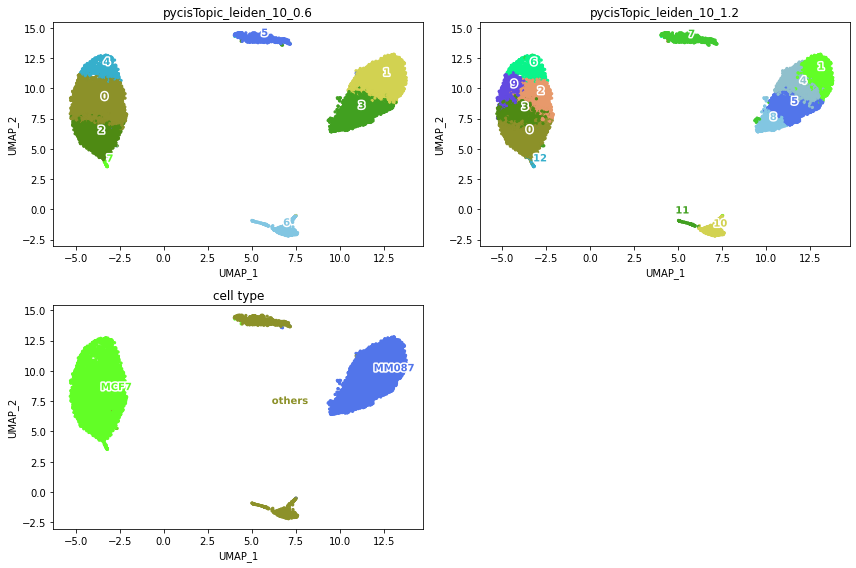

In [11]:
plot_metadata(cistopic_obj,
                 reduction_name='UMAP',
                 variables=['pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'cell type'], # Labels from RNA and new clusters
                 target='cell', num_columns=2,
                 text_size=10,
                 dot_size=5,
                 figsize=(12,8),
                 save= outDir + 'visualization/dimensionality_reduction_label.pdf')

In [12]:
# Save
with open(outDir + 'CROP_multiome_cisTopicObject_noDBL.pkl', 'wb') as f:
    pickle.dump(cistopic_obj, f)

In [14]:
files_dir = '/lustre1/project/stg_00002/lcb/lcb_projects/CRM_CROP_seq_multi/cellranger_arc/CRM__4f279b__c7fd7d__10x_Multiome_MCF_VPR_and_MM_KRAB_full_seq/outs/'
cistopic_obj.cell_data.to_csv(files_dir + 'cell_data.tsv', sep = '\t')

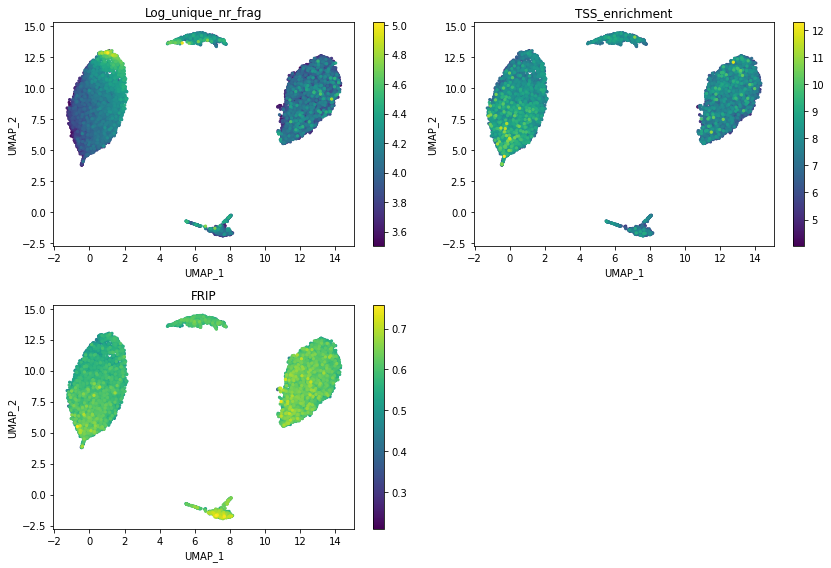

In [31]:
plot_metadata(cistopic_obj,
                 reduction_name='UMAP',
                 variables=['Log_unique_nr_frag', 'TSS_enrichment', 'FRIP'], 
                 target='cell', num_columns=2,
                 text_size=10,
                 dot_size=5,
                 figsize=(12,8),
                 save= outDir + 'visualization/dimensionality_reduction_number.pdf')

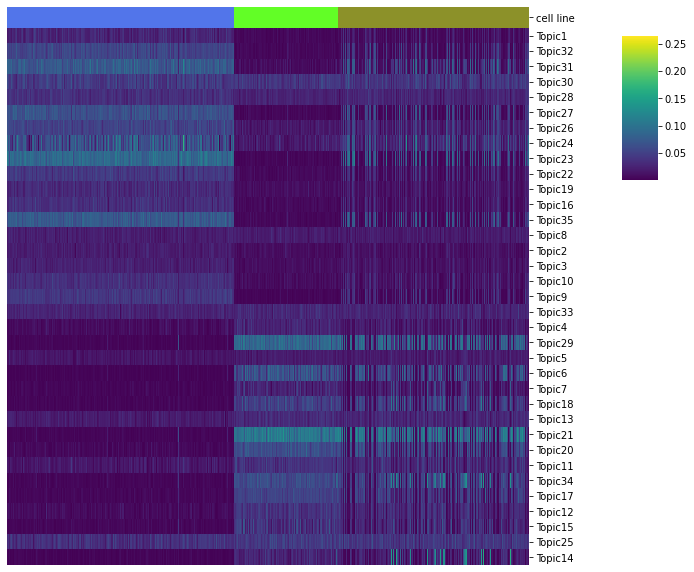

In [33]:
cell_topic_heatmap(cistopic_obj,
                     variables = ['cell line'],
                     scale = False,
                     legend_loc_x = 1.05,
                     legend_loc_y = -1.2,
                     legend_dist_y = -1,
                     figsize=(10,10),
                     save = outDir + 'visualization/heatmap_topic_contr.pdf')

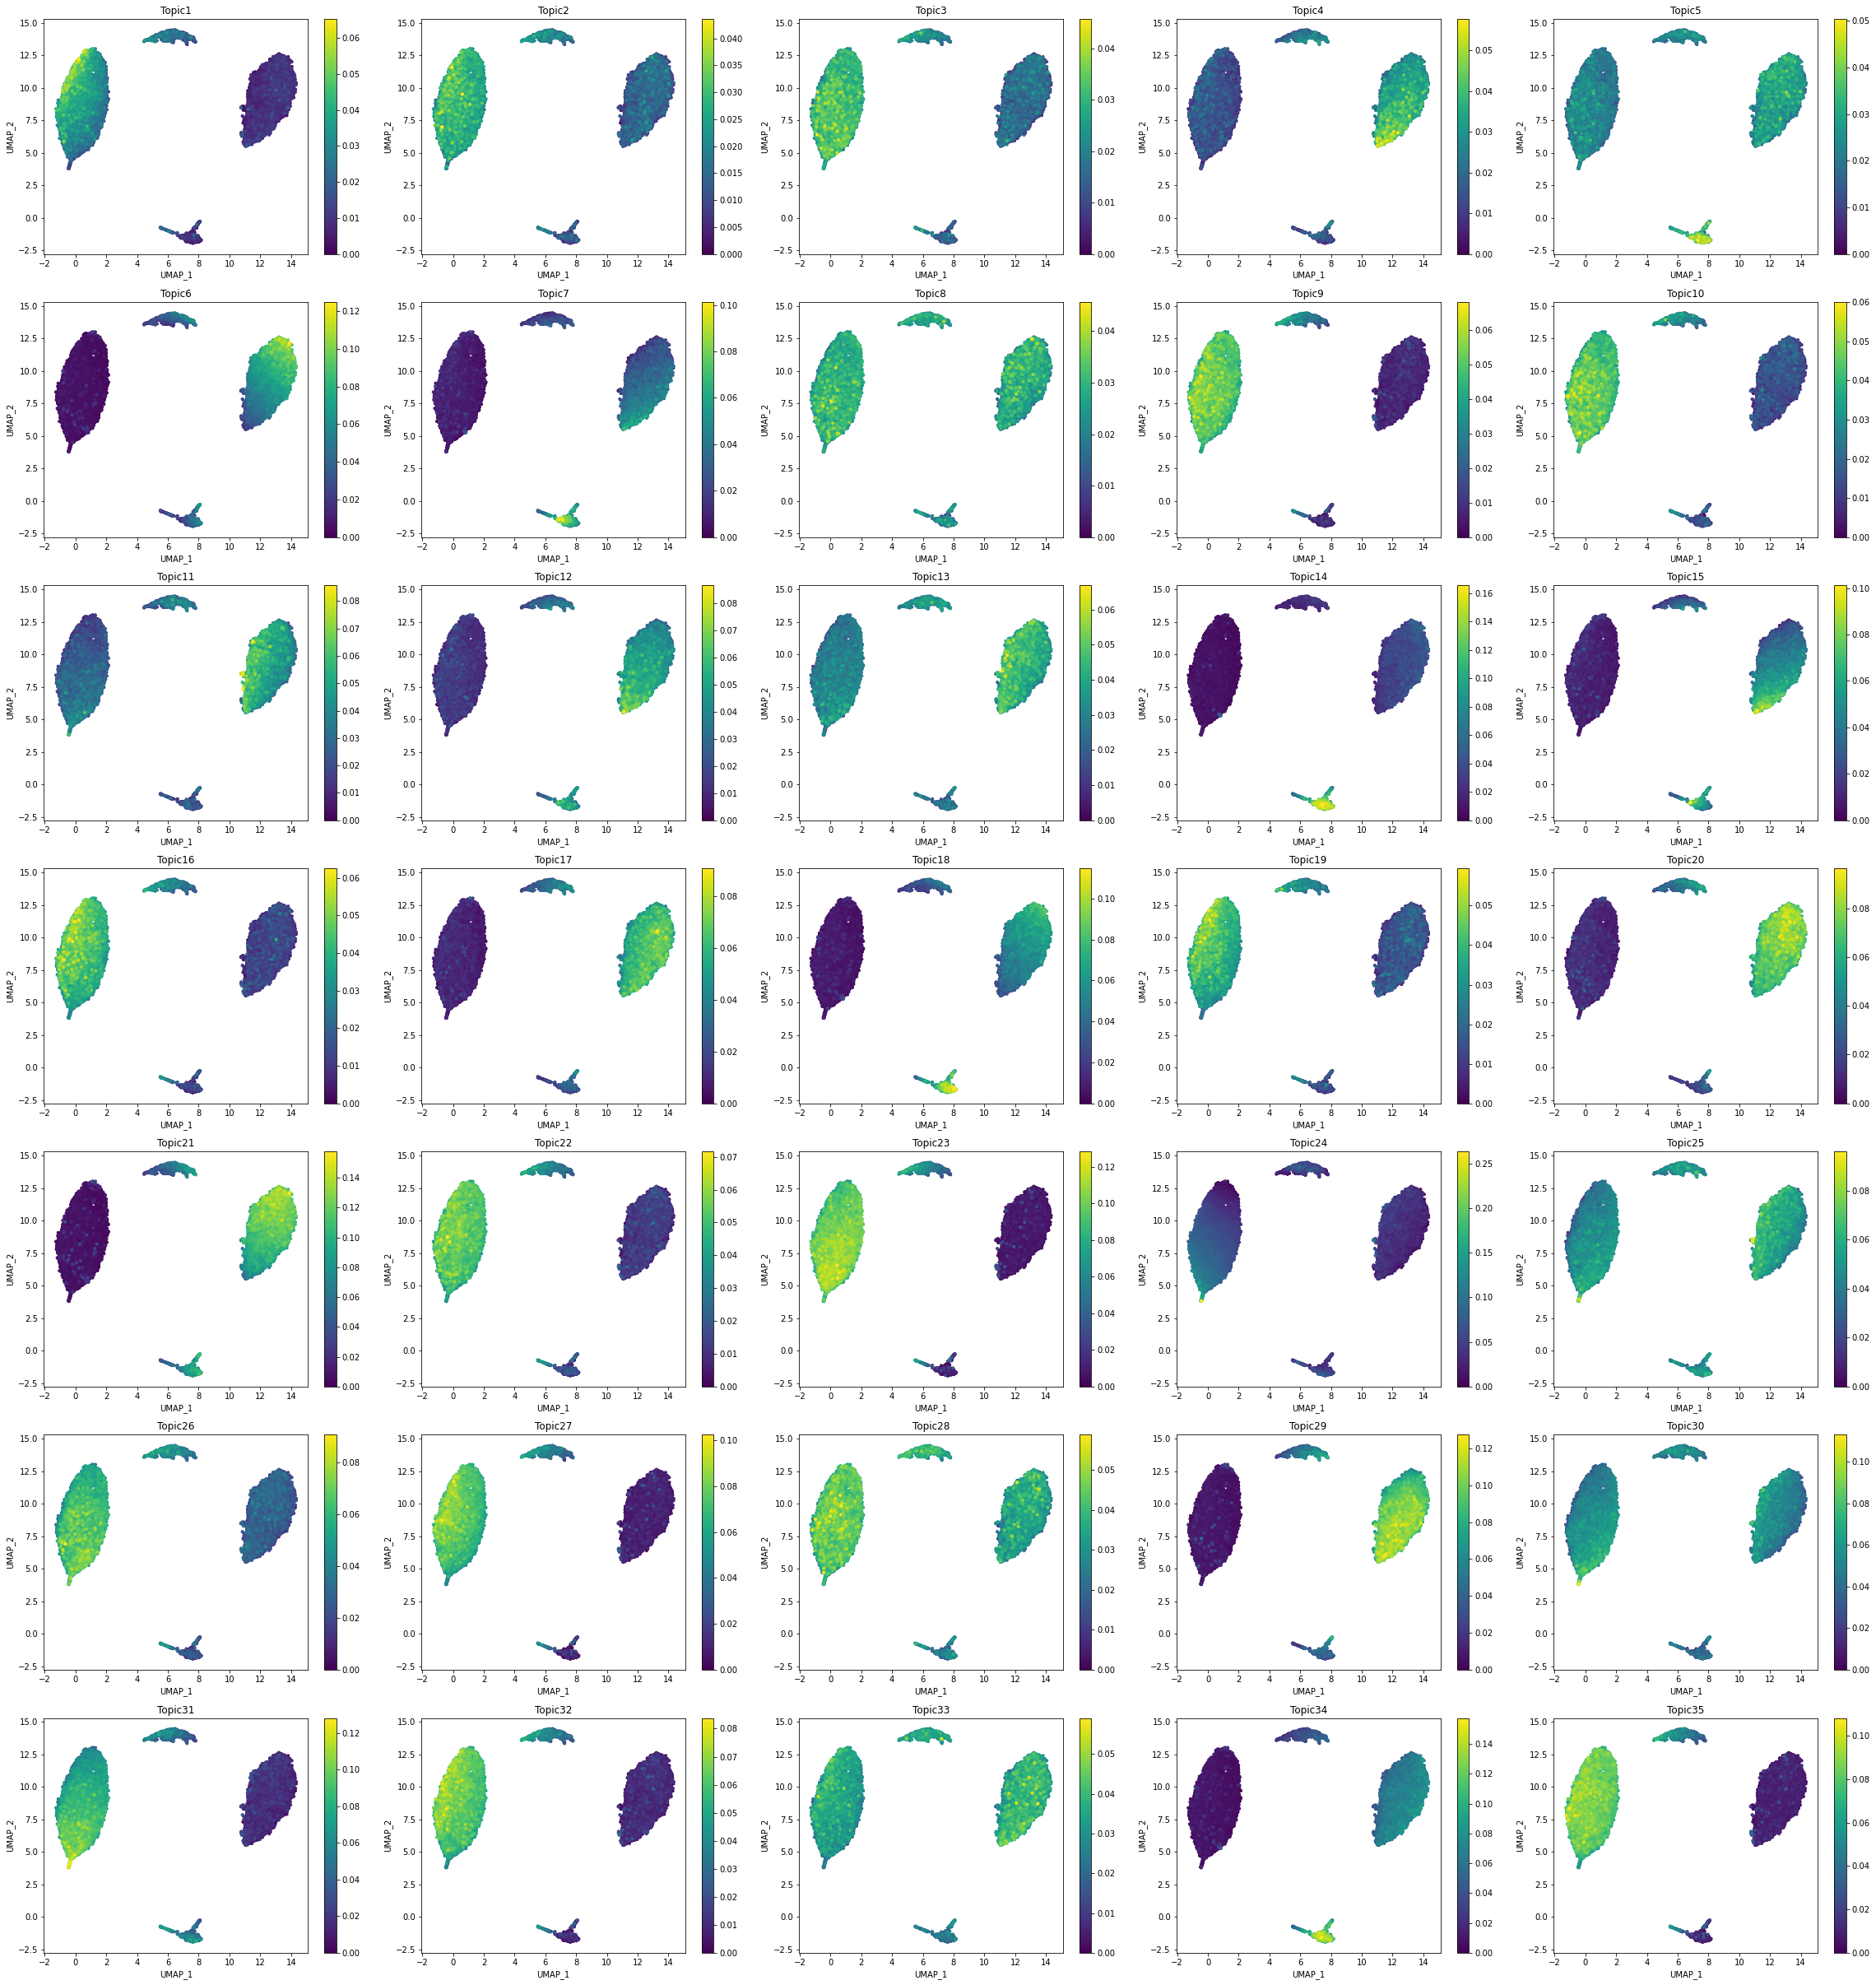

In [34]:
plot_topic(cistopic_obj,
            reduction_name = 'UMAP',
            target = 'cell',
            num_columns=5,
            save= outDir + 'visualization/dimensionality_reduction_topic_contr.pdf')

In [35]:
# Save
with open(outDir + 'CROP_multiome_cisTopicObject_noDBL.pkl', 'wb') as f:
    pickle.dump(cistopic_obj, f)

## Seurat embedding

In [5]:
mcf7_embedding = pd.read_csv('scRNA_mcf7_pca_embeddings')
mm087_embedding = pd.read_csv('scRNA_mm087_pca_embeddings')

In [6]:
mcf7_embedding.head()

Unnamed: 0       PC_1      PC_2       PC_3      PC_4      PC_5  \
0  AAACAGCCACAGAAAC  17.448678 -1.066701 -11.425763  2.531066 -0.256616   
1  AAACAGCCACTAGCGT  15.334625  2.261437   1.242490 -4.712294  1.557794   
2  AAACATGCACAGACTC -11.183131  4.479520  -7.953466 -1.330556 -4.216866   
3  AAACATGCACTATGGC  14.568298  1.045068   3.131685 -2.725917  0.817511   
4  AAACATGCACTTGTTC  17.800858  0.360359  -5.970371 -3.189454 -1.030544   

       PC_6      PC_7      PC_8      PC_9  ...     PC_41     PC_42     PC_43  \
0  3.812331  4.193566 -0.965078  1.108245  ... -0.003661  0.441075 -1.400066   
1 -1.215083 -0.236086 -3.097925  3.568818  ... -1.777612  0.305123  0.068148   
2 -3.827522 -0.415365 -0.783112 -0.687227  ...  1.170102 -0.684025  0.546428   
3 -1.517884  1.214522  1.248620 -2.016290  ... -0.406381  0.736299  0.613862   
4 -0.953568 -2.972251  1.960242 -3.779158  ... -0.130730 -1.035021 -1.609051   

      PC_44     PC_45     PC_46     PC_47     PC_48     PC_49     PC_50  
0 -2.259560 -0.735283 -2.267961 -0.822775  1.137346  1.514291  0.700149  
1 -0.502580  2.433655  0.014376 -0.929533 -1.921276  1.647357 -0.125873  
2  1.913106  0.046942 -1.850747  0.247861  1.185500 -1.835931  0.954576  
3 -2.183028 -0.959413  0.461861  0.208739 -1.555613  0.150247  0.979235  
4  0.592738 -0.038261 -0.291924  1.216372  1.753592  1.138977 -0.780844  

[5 rows x 51 columns]

In [7]:
mcf7_embedding.set_index(pd.Index(mcf7_embedding["Unnamed: 0"] + "-1-CRM_CROP_seq_multi"), inplace = True)
mcf7_embedding = mcf7_embedding.drop(columns=["Unnamed: 0"])
mcf7_embedding.head()

PC_1      PC_2       PC_3  \
Unnamed: 0                                                              
AAACAGCCACAGAAAC-1-CRM_CROP_seq_multi  17.448678 -1.066701 -11.425763   
AAACAGCCACTAGCGT-1-CRM_CROP_seq_multi  15.334625  2.261437   1.242490   
AAACATGCACAGACTC-1-CRM_CROP_seq_multi -11.183131  4.479520  -7.953466   
AAACATGCACTATGGC-1-CRM_CROP_seq_multi  14.568298  1.045068   3.131685   
AAACATGCACTTGTTC-1-CRM_CROP_seq_multi  17.800858  0.360359  -5.970371   

                                           PC_4      PC_5      PC_6      PC_7  \
Unnamed: 0                                                                      
AAACAGCCACAGAAAC-1-CRM_CROP_seq_multi  2.531066 -0.256616  3.812331  4.193566   
AAACAGCCACTAGCGT-1-CRM_CROP_seq_multi -4.712294  1.557794 -1.215083 -0.236086   
AAACATGCACAGACTC-1-CRM_CROP_seq_multi -1.330556 -4.216866 -3.827522 -0.415365   
AAACATGCACTATGGC-1-CRM_CROP_seq_multi -2.725917  0.817511 -1.517884  1.214522   
AAACATGCACTTGTTC-1-CRM_CROP_seq_multi -3.189454 -1.030544 -0.953568 -2.972251   

                                           PC_8      PC_9     PC_10  ...  \
Unnamed: 0                                                           ...   
AAACAGCCACAGAAAC-1-CRM_CROP_seq_multi -0.965078  1.108245 -0.087565  ...   
AAACAGCCACTAGCGT-1-CRM_CROP_seq_multi -3.097925  3.568818 -5.083042  ...   
AAACATGCACAGACTC-1-CRM_CROP_seq_multi -0.783112 -0.687227  1.995989  ...   
AAACATGCACTATGGC-1-CRM_CROP_seq_multi  1.248620 -2.016290  2.424003  ...   
AAACATGCACTTGTTC-1-CRM_CROP_seq_multi  1.960242 -3.779158  2.550852  ...   

                                          PC_41     PC_42     PC_43     PC_44  \
Unnamed: 0                                                                      
AAACAGCCACAGAAAC-1-CRM_CROP_seq_multi -0.003661  0.441075 -1.400066 -2.259560   
AAACAGCCACTAGCGT-1-CRM_CROP_seq_multi -1.777612  0.305123  0.068148 -0.502580   
AAACATGCACAGACTC-1-CRM_CROP_seq_multi  1.170102 -0.684025  0.546428  1.913106   
AAACATGCACTATGGC-1-CRM_CROP_seq_multi -0.406381  0.736299  0.613862 -2.183028   
AAACATGCACTTGTTC-1-CRM_CROP_seq_multi -0.130730 -1.035021 -1.609051  0.592738   

                                          PC_45     PC_46     PC_47     PC_48  \
Unnamed: 0                                                                      
AAACAGCCACAGAAAC-1-CRM_CROP_seq_multi -0.735283 -2.267961 -0.822775  1.137346   
AAACAGCCACTAGCGT-1-CRM_CROP_seq_multi  2.433655  0.014376 -0.929533 -1.921276   
AAACATGCACAGACTC-1-CRM_CROP_seq_multi  0.046942 -1.850747  0.247861  1.185500   
AAACATGCACTATGGC-1-CRM_CROP_seq_multi -0.959413  0.461861  0.208739 -1.555613   
AAACATGCACTTGTTC-1-CRM_CROP_seq_multi -0.038261 -0.291924  1.216372  1.753592   

                                          PC_49     PC_50  
Unnamed: 0                                                 
AAACAGCCACAGAAAC-1-CRM_CROP_seq_multi  1.514291  0.700149  
AAACAGCCACTAGCGT-1-CRM_CROP_seq_multi  1.647357 -0.125873  
AAACATGCACAGACTC-1-CRM_CROP_seq_multi -1.835931  0.954576  
AAACATGCACTATGGC-1-CRM_CROP_seq_multi  0.150247  0.979235  
AAACATGCACTTGTTC-1-CRM_CROP_seq_multi  1.138977 -0.780844  

[5 rows x 50 columns]

In [8]:
mm087_embedding.set_index(pd.Index(mm087_embedding["Unnamed: 0"] + "-1-CRM_CROP_seq_multi"), inplace = True)
mm087_embedding = mm087_embedding.drop(columns=["Unnamed: 0"])
mm087_embedding.head()

PC_1      PC_2      PC_3  \
Unnamed: 0                                                             
AAACAGCCACCGGTAT-1-CRM_CROP_seq_multi -17.765860  3.274270  3.754522   
AAACAGCCAGTTAGCC-1-CRM_CROP_seq_multi  -8.447322  3.229132 -1.245963   
AAACAGCCAGTTTCTC-1-CRM_CROP_seq_multi -14.106788  3.813330  5.705553   
AAACCAACAACCGCCA-1-CRM_CROP_seq_multi -18.501922  6.255666  0.762704   
AAACCAACACAACAGG-1-CRM_CROP_seq_multi -15.926886 -2.491270 -7.315546   

                                           PC_4      PC_5      PC_6      PC_7  \
Unnamed: 0                                                                      
AAACAGCCACCGGTAT-1-CRM_CROP_seq_multi -2.643449 -4.292234  2.006471  1.313615   
AAACAGCCAGTTAGCC-1-CRM_CROP_seq_multi -5.414935 -1.122391  1.788339  0.125650   
AAACAGCCAGTTTCTC-1-CRM_CROP_seq_multi  2.440198 -4.633987 -1.119372 -0.909270   
AAACCAACAACCGCCA-1-CRM_CROP_seq_multi -2.870078 -1.990150 -2.485927  0.405798   
AAACCAACACAACAGG-1-CRM_CROP_seq_multi  3.772976  7.141164 -7.524871 -3.098717   

                                           PC_8      PC_9     PC_10  ...  \
Unnamed: 0                                                           ...   
AAACAGCCACCGGTAT-1-CRM_CROP_seq_multi -1.359706 -0.412901 -0.093396  ...   
AAACAGCCAGTTAGCC-1-CRM_CROP_seq_multi -1.520545  1.497260  0.897897  ...   
AAACAGCCAGTTTCTC-1-CRM_CROP_seq_multi  0.262560  1.259497 -0.321849  ...   
AAACCAACAACCGCCA-1-CRM_CROP_seq_multi -0.309870  2.801370  0.230402  ...   
AAACCAACACAACAGG-1-CRM_CROP_seq_multi  4.691305 -2.338870 -3.039479  ...   

                                          PC_41     PC_42     PC_43     PC_44  \
Unnamed: 0                                                                      
AAACAGCCACCGGTAT-1-CRM_CROP_seq_multi -1.943582  0.559515 -0.127851  0.839998   
AAACAGCCAGTTAGCC-1-CRM_CROP_seq_multi -1.052099  0.621400 -0.697757  0.637978   
AAACAGCCAGTTTCTC-1-CRM_CROP_seq_multi  0.402187 -0.903954  0.291007 -0.811430   
AAACCAACAACCGCCA-1-CRM_CROP_seq_multi -0.251628 -1.068436  0.626152  3.033408   
AAACCAACACAACAGG-1-CRM_CROP_seq_multi -2.112464  0.926553  0.211383 -1.112454   

                                          PC_45     PC_46     PC_47     PC_48  \
Unnamed: 0                                                                      
AAACAGCCACCGGTAT-1-CRM_CROP_seq_multi  0.491669  0.336432 -1.461786  1.387341   
AAACAGCCAGTTAGCC-1-CRM_CROP_seq_multi  0.933081  2.056587  0.891730  0.905084   
AAACAGCCAGTTTCTC-1-CRM_CROP_seq_multi -2.050494  1.626349 -1.022244  0.830953   
AAACCAACAACCGCCA-1-CRM_CROP_seq_multi  0.220091 -0.272554 -0.685095  0.248137   
AAACCAACACAACAGG-1-CRM_CROP_seq_multi  0.223714 -0.605989  0.128688 -1.499681   

                                          PC_49     PC_50  
Unnamed: 0                                                 
AAACAGCCACCGGTAT-1-CRM_CROP_seq_multi -1.539174  0.014186  
AAACAGCCAGTTAGCC-1-CRM_CROP_seq_multi -0.758207  1.714122  
AAACAGCCAGTTTCTC-1-CRM_CROP_seq_multi -0.586662  2.261443  
AAACCAACAACCGCCA-1-CRM_CROP_seq_multi -0.354696  1.054592  
AAACCAACACAACAGG-1-CRM_CROP_seq_multi  0.379517 -2.190894  

[5 rows x 50 columns]

In [9]:
run_pca = pd.concat([mcf7_embedding, mm087_embedding], ignore_index=False)

In [10]:
cistopic_obj.cell_data

Unique_nr_frag  Dupl_rate  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            5935   0.127719   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            7747   0.130723   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi           22452   0.149126   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi           28284   0.186774   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi           17441   0.182057   
...                                               ...        ...   
GCCGTGAGTTGAGCCG-1-CRM_CROP_seq_multi            4455   0.132762   
TGCTTCATCCATTACT-1-CRM_CROP_seq_multi            3431   0.115266   
GGTATGTTCTCAATGA-1-CRM_CROP_seq_multi            4006   0.111358   
TGTTGGCCACAGAACG-1-CRM_CROP_seq_multi            4427   0.126135   
TTATTGCTCCTTGAGG-1-CRM_CROP_seq_multi            6705   0.131477   

                                      cisTopic_nr_frag           barcode  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi             3013  ATTGCTCGTCACCAAA   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi             3877  GGCGTTATCAAAGGCA   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi             9438  TATCACAAGACAGGTA   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            16447  CCTGTTGGTGCGCATG   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi             9790  GTATTGCAGGTTAGAG   
...                                                ...               ...   
GCCGTGAGTTGAGCCG-1-CRM_CROP_seq_multi             2488  GCCGTGAGTTGAGCCG   
TGCTTCATCCATTACT-1-CRM_CROP_seq_multi             2037  TGCTTCATCCATTACT   
GGTATGTTCTCAATGA-1-CRM_CROP_seq_multi             2208  GGTATGTTCTCAATGA   
TGTTGGCCACAGAACG-1-CRM_CROP_seq_multi             2367  TGTTGGCCACAGAACG   
TTATTGCTCCTTGAGG-1-CRM_CROP_seq_multi             3139  TTATTGCTCCTTGAGG   

                                       Total_nr_frag cisTopic_log_nr_frag  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi           6804             3.478999   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi           8912             3.588496   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi          26387              3.97488   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi          34780             4.216087   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi          21323             3.990783   
...                                              ...                  ...   
GCCGTGAGTTGAGCCG-1-CRM_CROP_seq_multi           5137              3.39585   
TGCTTCATCCATTACT-1-CRM_CROP_seq_multi           3878             3.308991   
GGTATGTTCTCAATGA-1-CRM_CROP_seq_multi           4508             3.343999   
TGTTGGCCACAGAACG-1-CRM_CROP_seq_multi           5066             3.374198   
TTATTGCTCCTTGAGG-1-CRM_CROP_seq_multi           7720             3.496791   

                                       Log_unique_nr_frag           sample_id  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            3.773421  CRM_CROP_seq_multi   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            3.889134  CRM_CROP_seq_multi   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi            4.351255  CRM_CROP_seq_multi   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            4.451541  CRM_CROP_seq_multi   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi            4.241571  CRM_CROP_seq_multi   
...                                                   ...                 ...   
GCCGTGAGTTGAGCCG-1-CRM_CROP_seq_multi            3.648848  CRM_CROP_seq_multi   
TGCTTCATCCATTACT-1-CRM_CROP_seq_multi            3.535421  CRM_CROP_seq_multi   
GGTATGTTCTCAATGA-1-CRM_CROP_seq_multi            3.602711  CRM_CROP_seq_multi   
TGTTGGCCACAGAACG-1-CRM_CROP_seq_multi            3.646110  CRM_CROP_seq_multi   
TTATTGCTCCTTGAGG-1-CRM_CROP_seq_multi            3.826399  CRM_CROP_seq_multi   

                                      cisTopic_log_nr_acc  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            3.444669   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            3.553762   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi            3.905742   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            4.123688   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi            3.926754   
...                                          

In [11]:
from pycisTopic.clust_vis import *
find_clusters(cistopic_obj, k=100, rna_components=run_pca, rna_weight = 0.8, prefix='Seurat_RNA+ATAC_', res=[2], split_pattern='-')

2022-03-23 14:52:10,719 cisTopic     INFO     Finding neighbours
2022-03-23 14:52:15,712 cisTopic     INFO     Finding clusters



In [12]:
# run_pca = pd.concat([mcf7_embedding, mm087_embedding], ignore_index=False)
# run_pca.head()
run_umap(cistopic_obj, rna_components=run_pca, rna_weight = 0.8, reduction_name='Seurat_RNA+ATAC_UMAP')

2022-03-23 14:52:22,210 cisTopic     INFO     Running UMAP


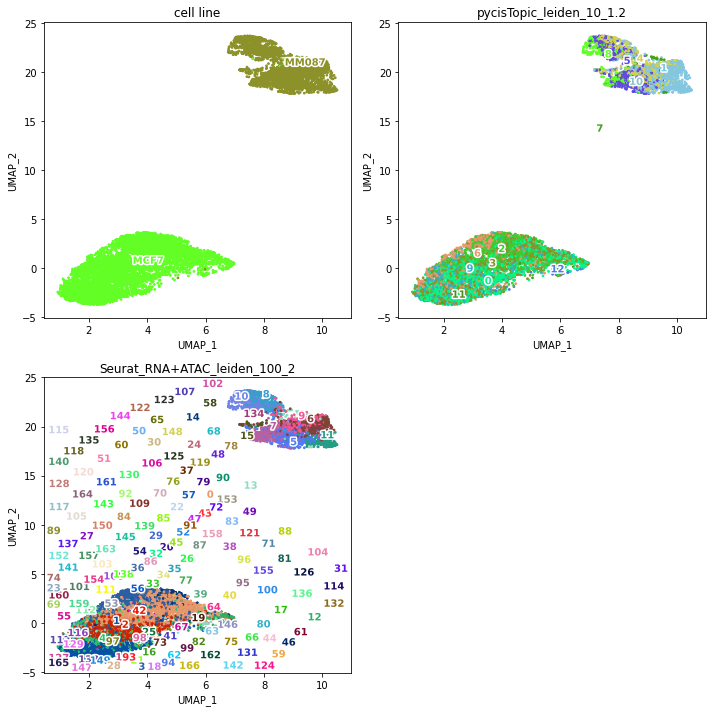

In [14]:
plot_metadata(cistopic_obj,
                 reduction_name='Seurat_RNA+ATAC_UMAP',
                 variables=['cell line', 'pycisTopic_leiden_10_1.2','Seurat_RNA+ATAC_leiden_100_2'], # Labels from RNA and new clusters
                 target='cell', num_columns=2,
                 text_size=10,
                 dot_size=3,
                 figsize=(10,10))

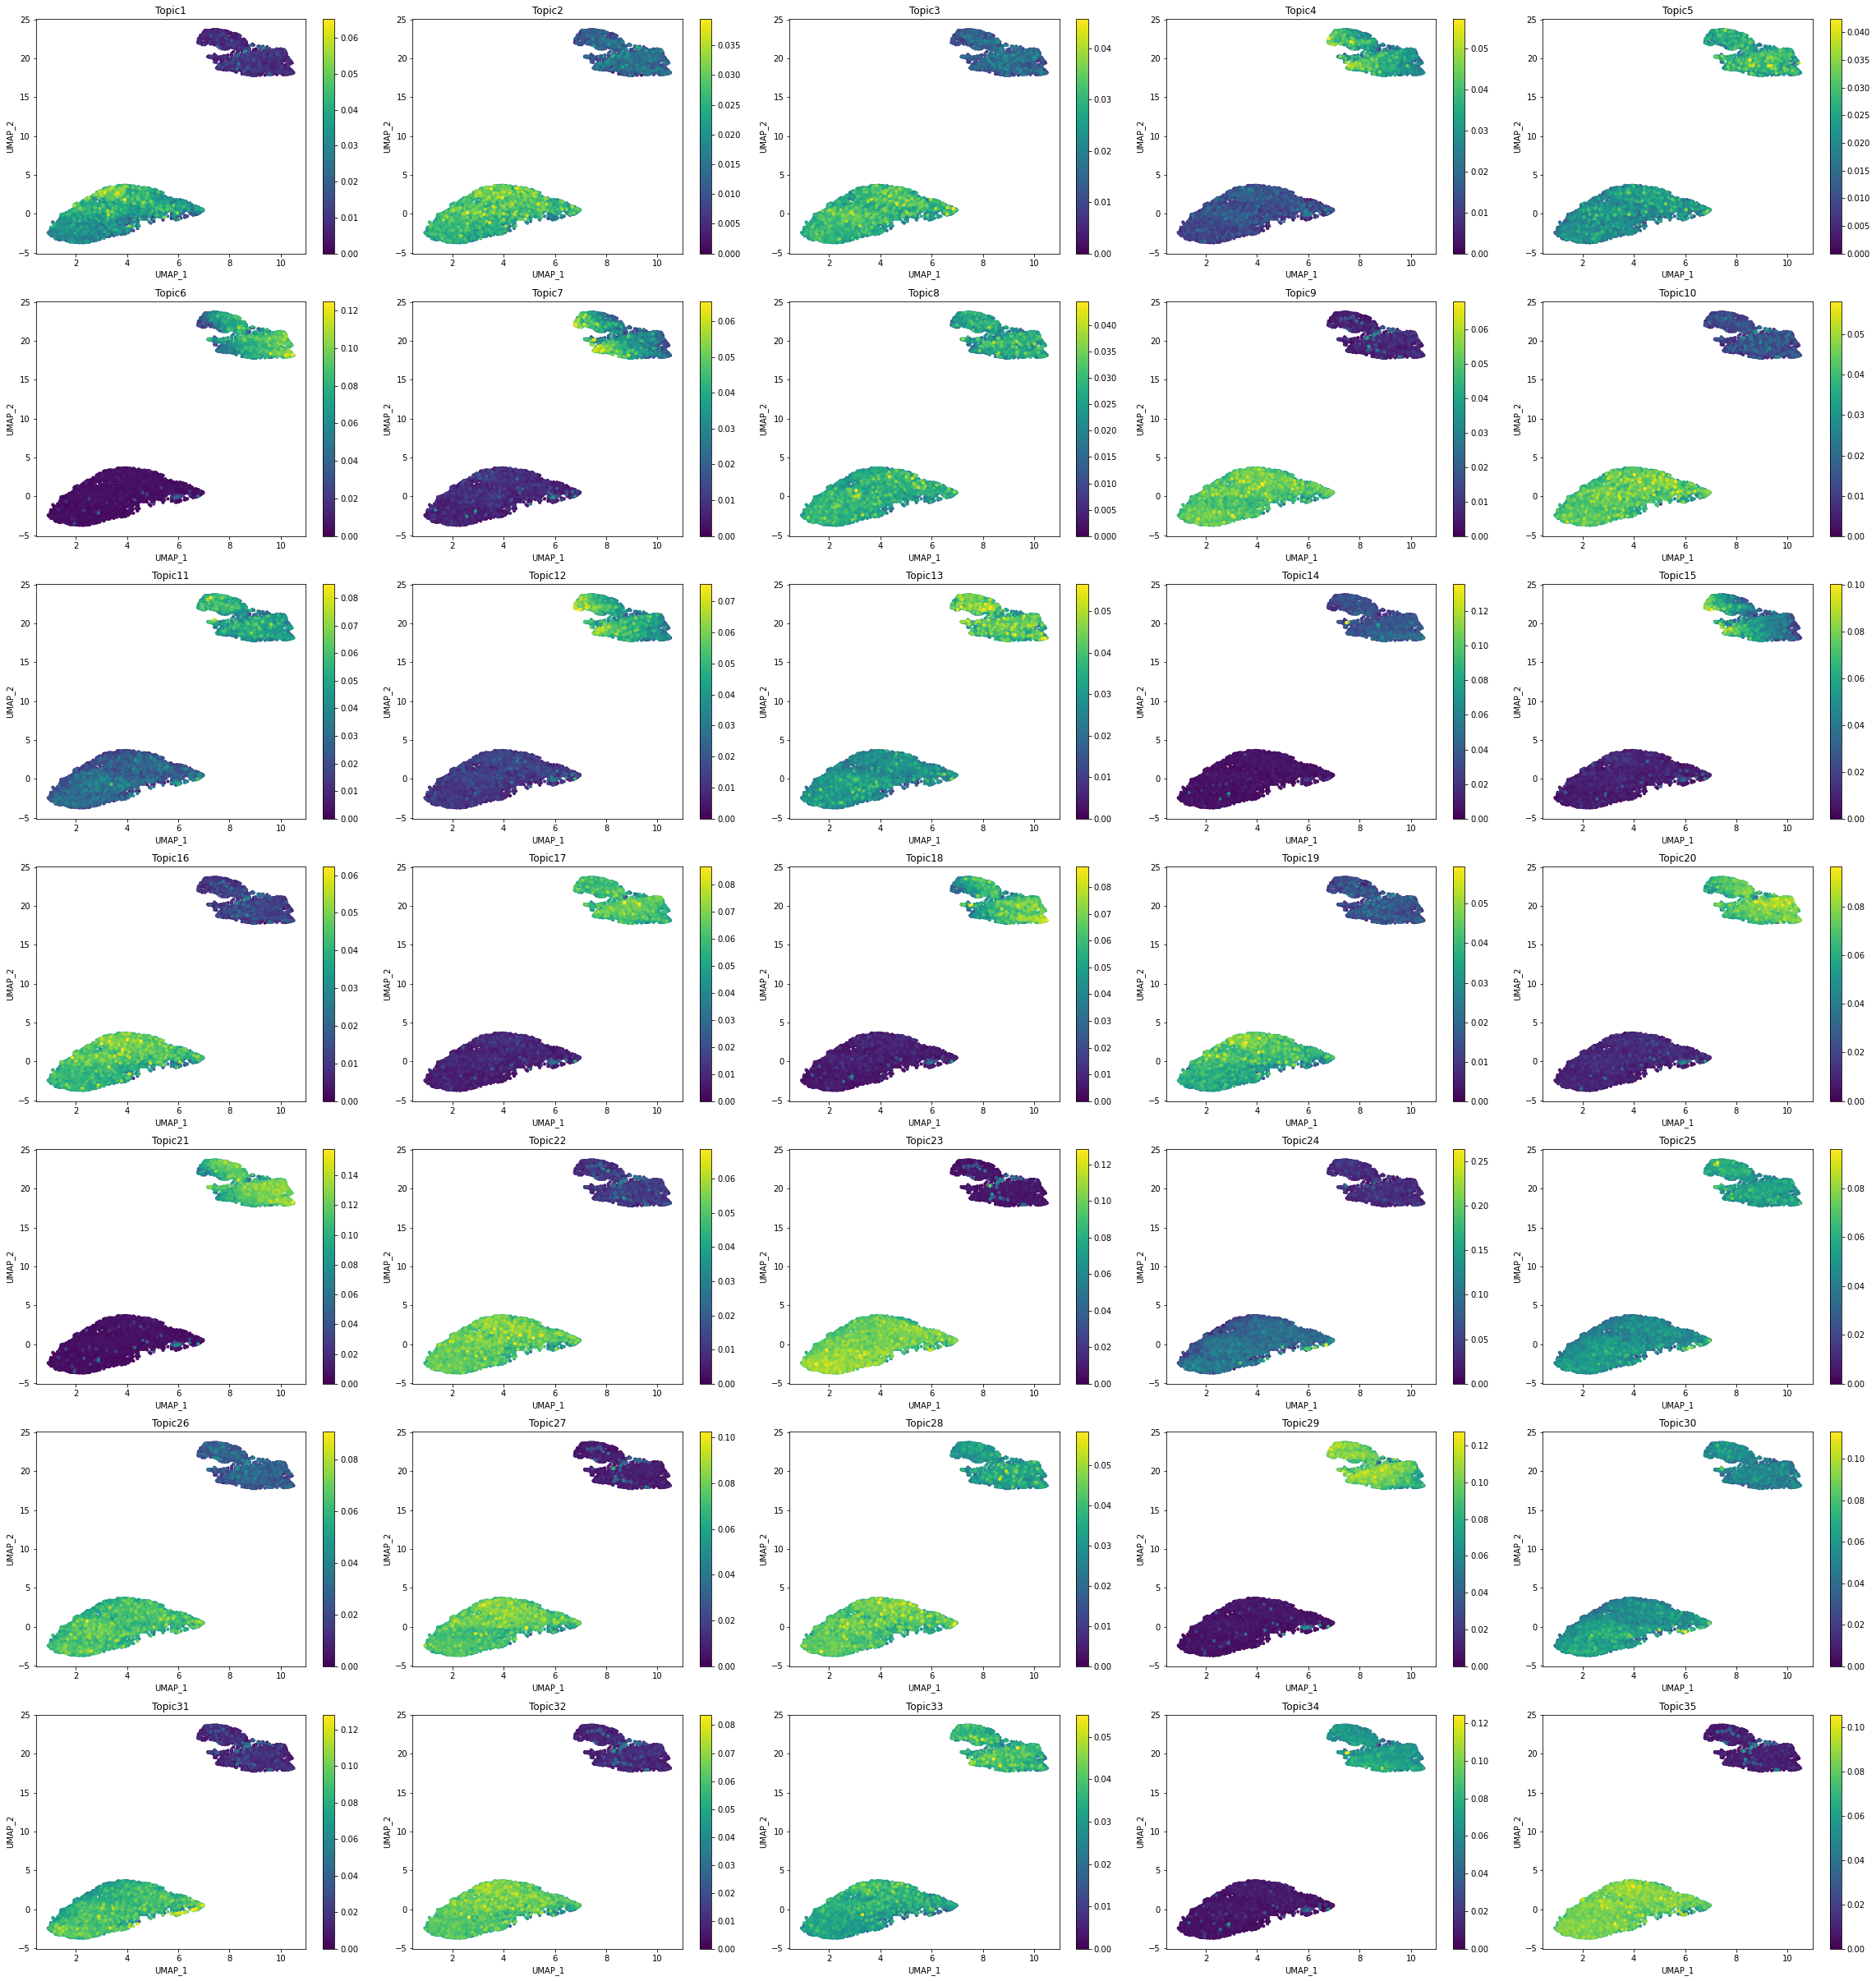

In [15]:
plot_topic(cistopic_obj, reduction_name='Seurat_RNA+ATAC_UMAP', num_columns=5)

In [17]:
# Save
with open(outDir + 'CROP_multiome_cisTopicObject_noDBL.pkl', 'wb') as f:
    pickle.dump(cistopic_obj, f)

## Topic binarization & QC

topic-region distributions

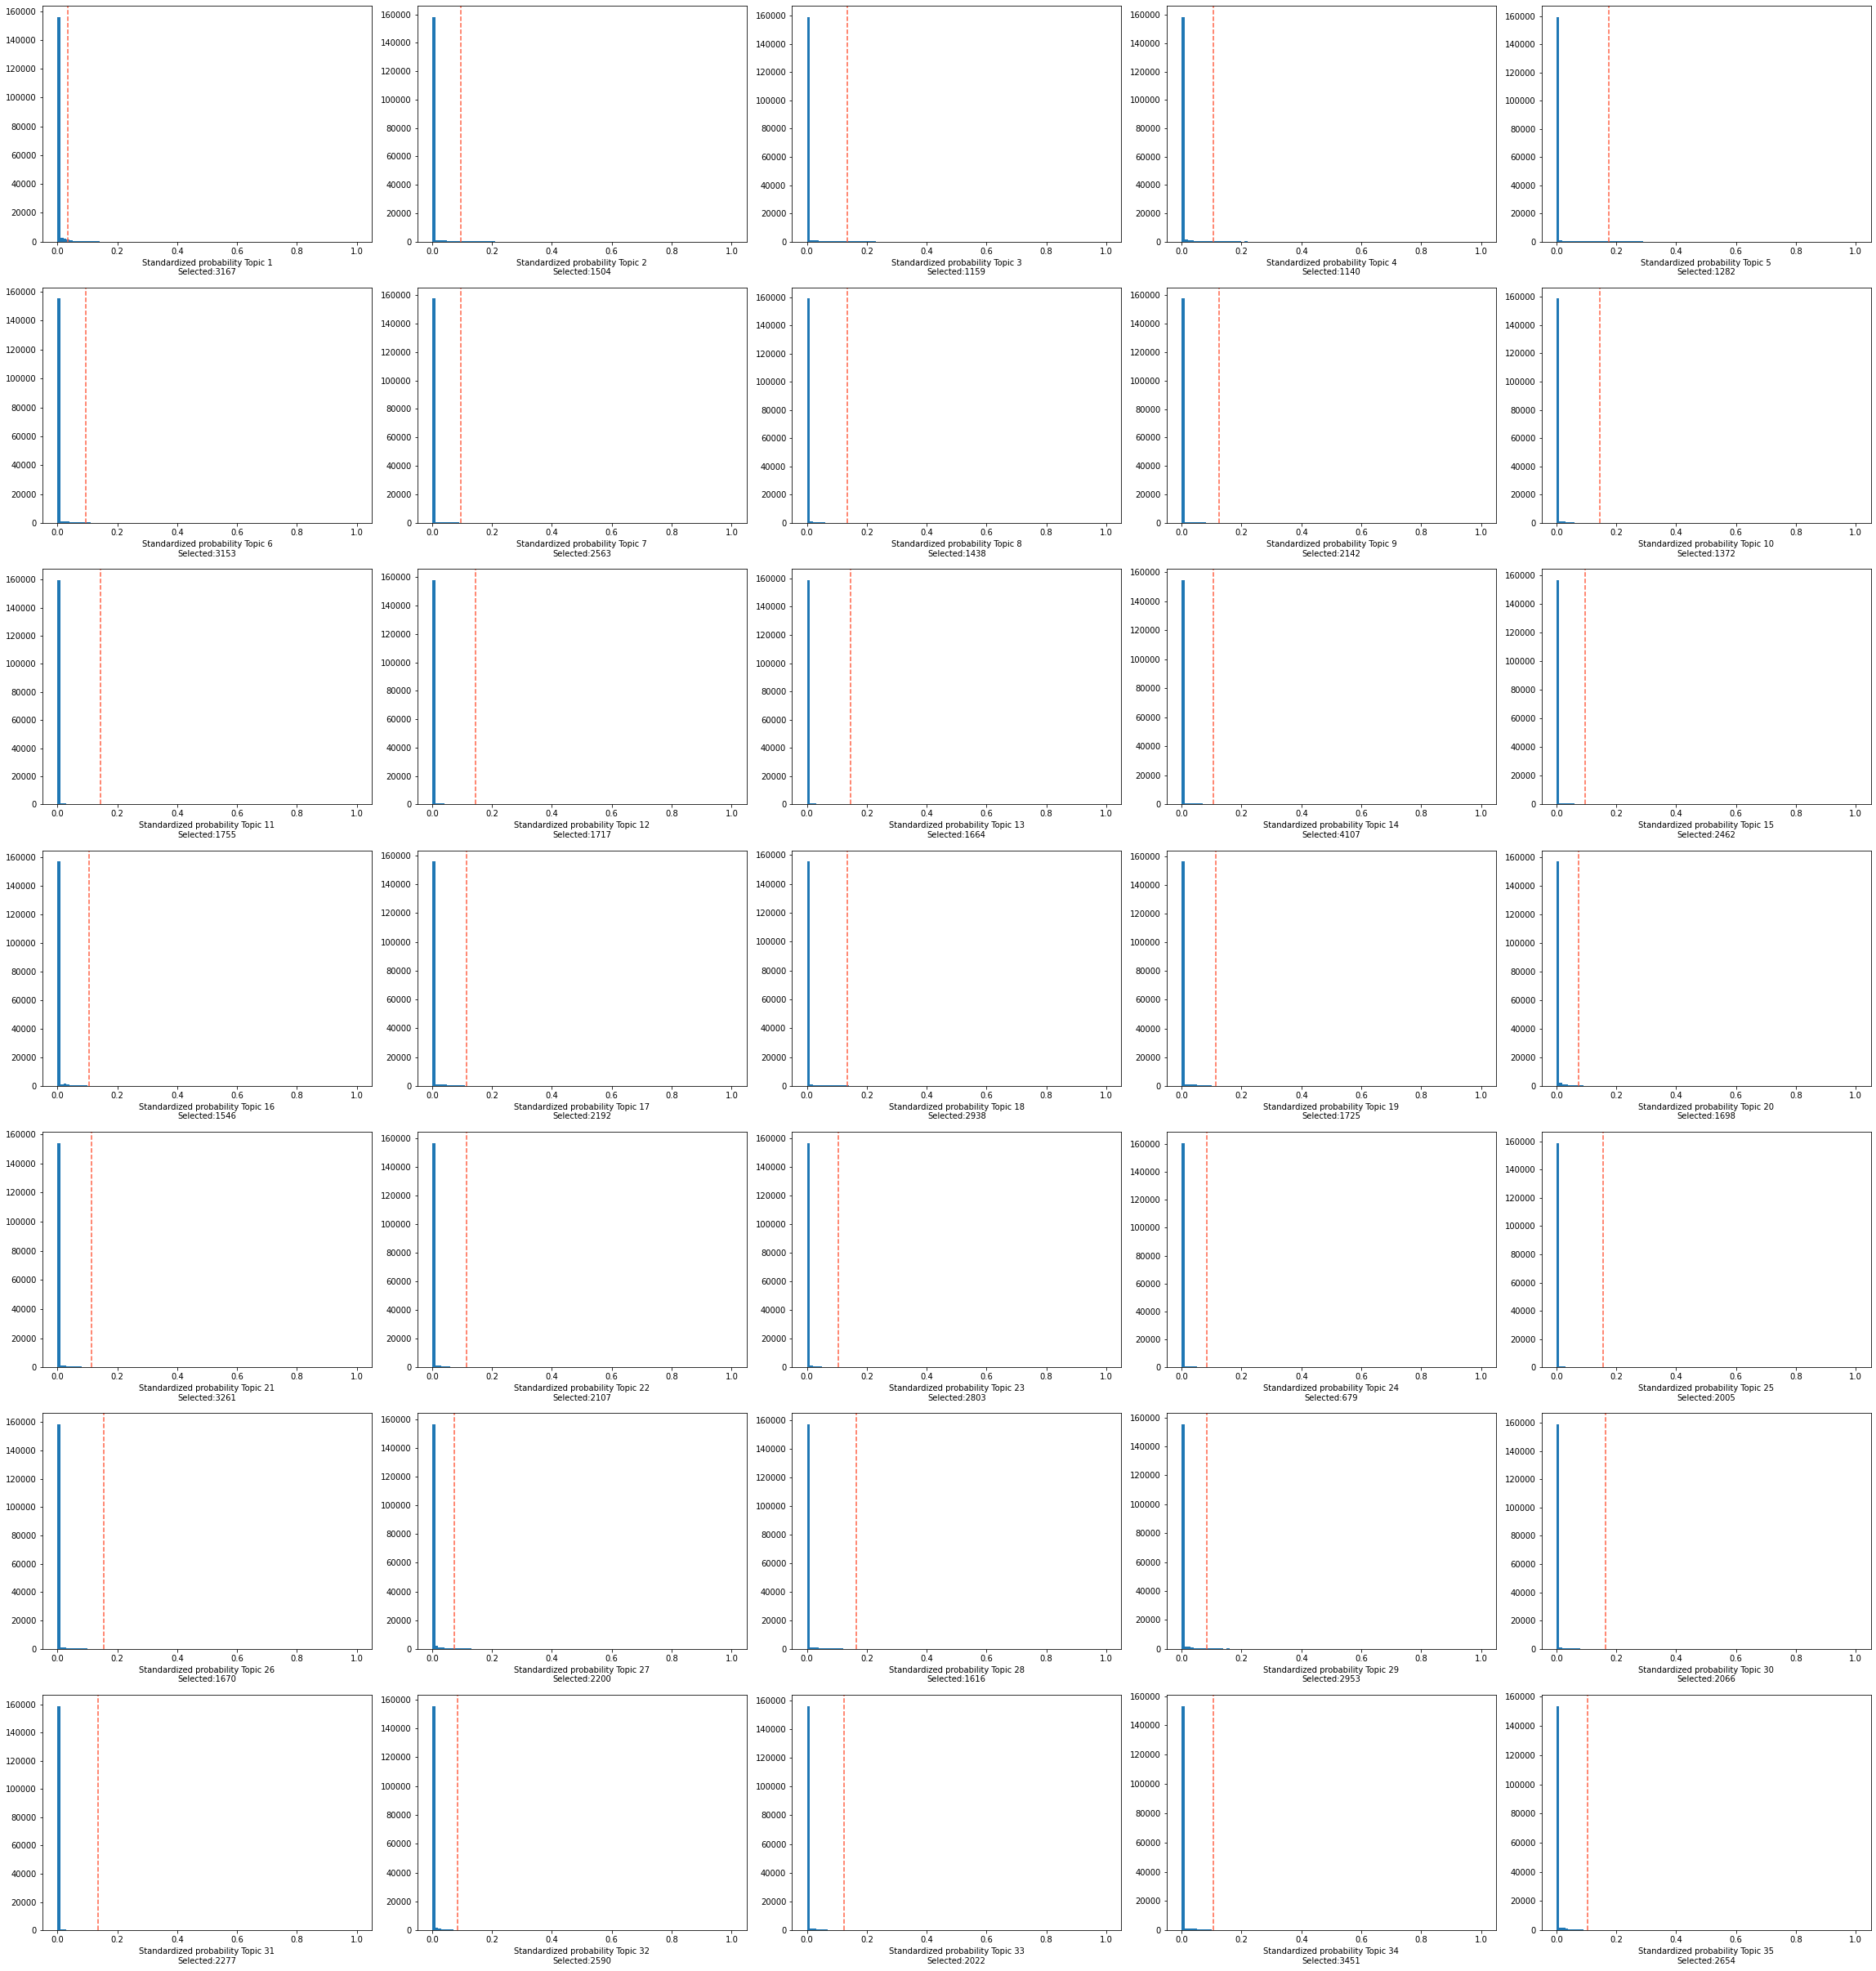

In [51]:
from pycisTopic.topic_binarization import *
region_bin_topics = binarize_topics(cistopic_obj, method='otsu', ntop=3000, plot=True, num_columns=5, save= outDir + 'topic_binarization/otsu.pdf')

cell-topic distributions

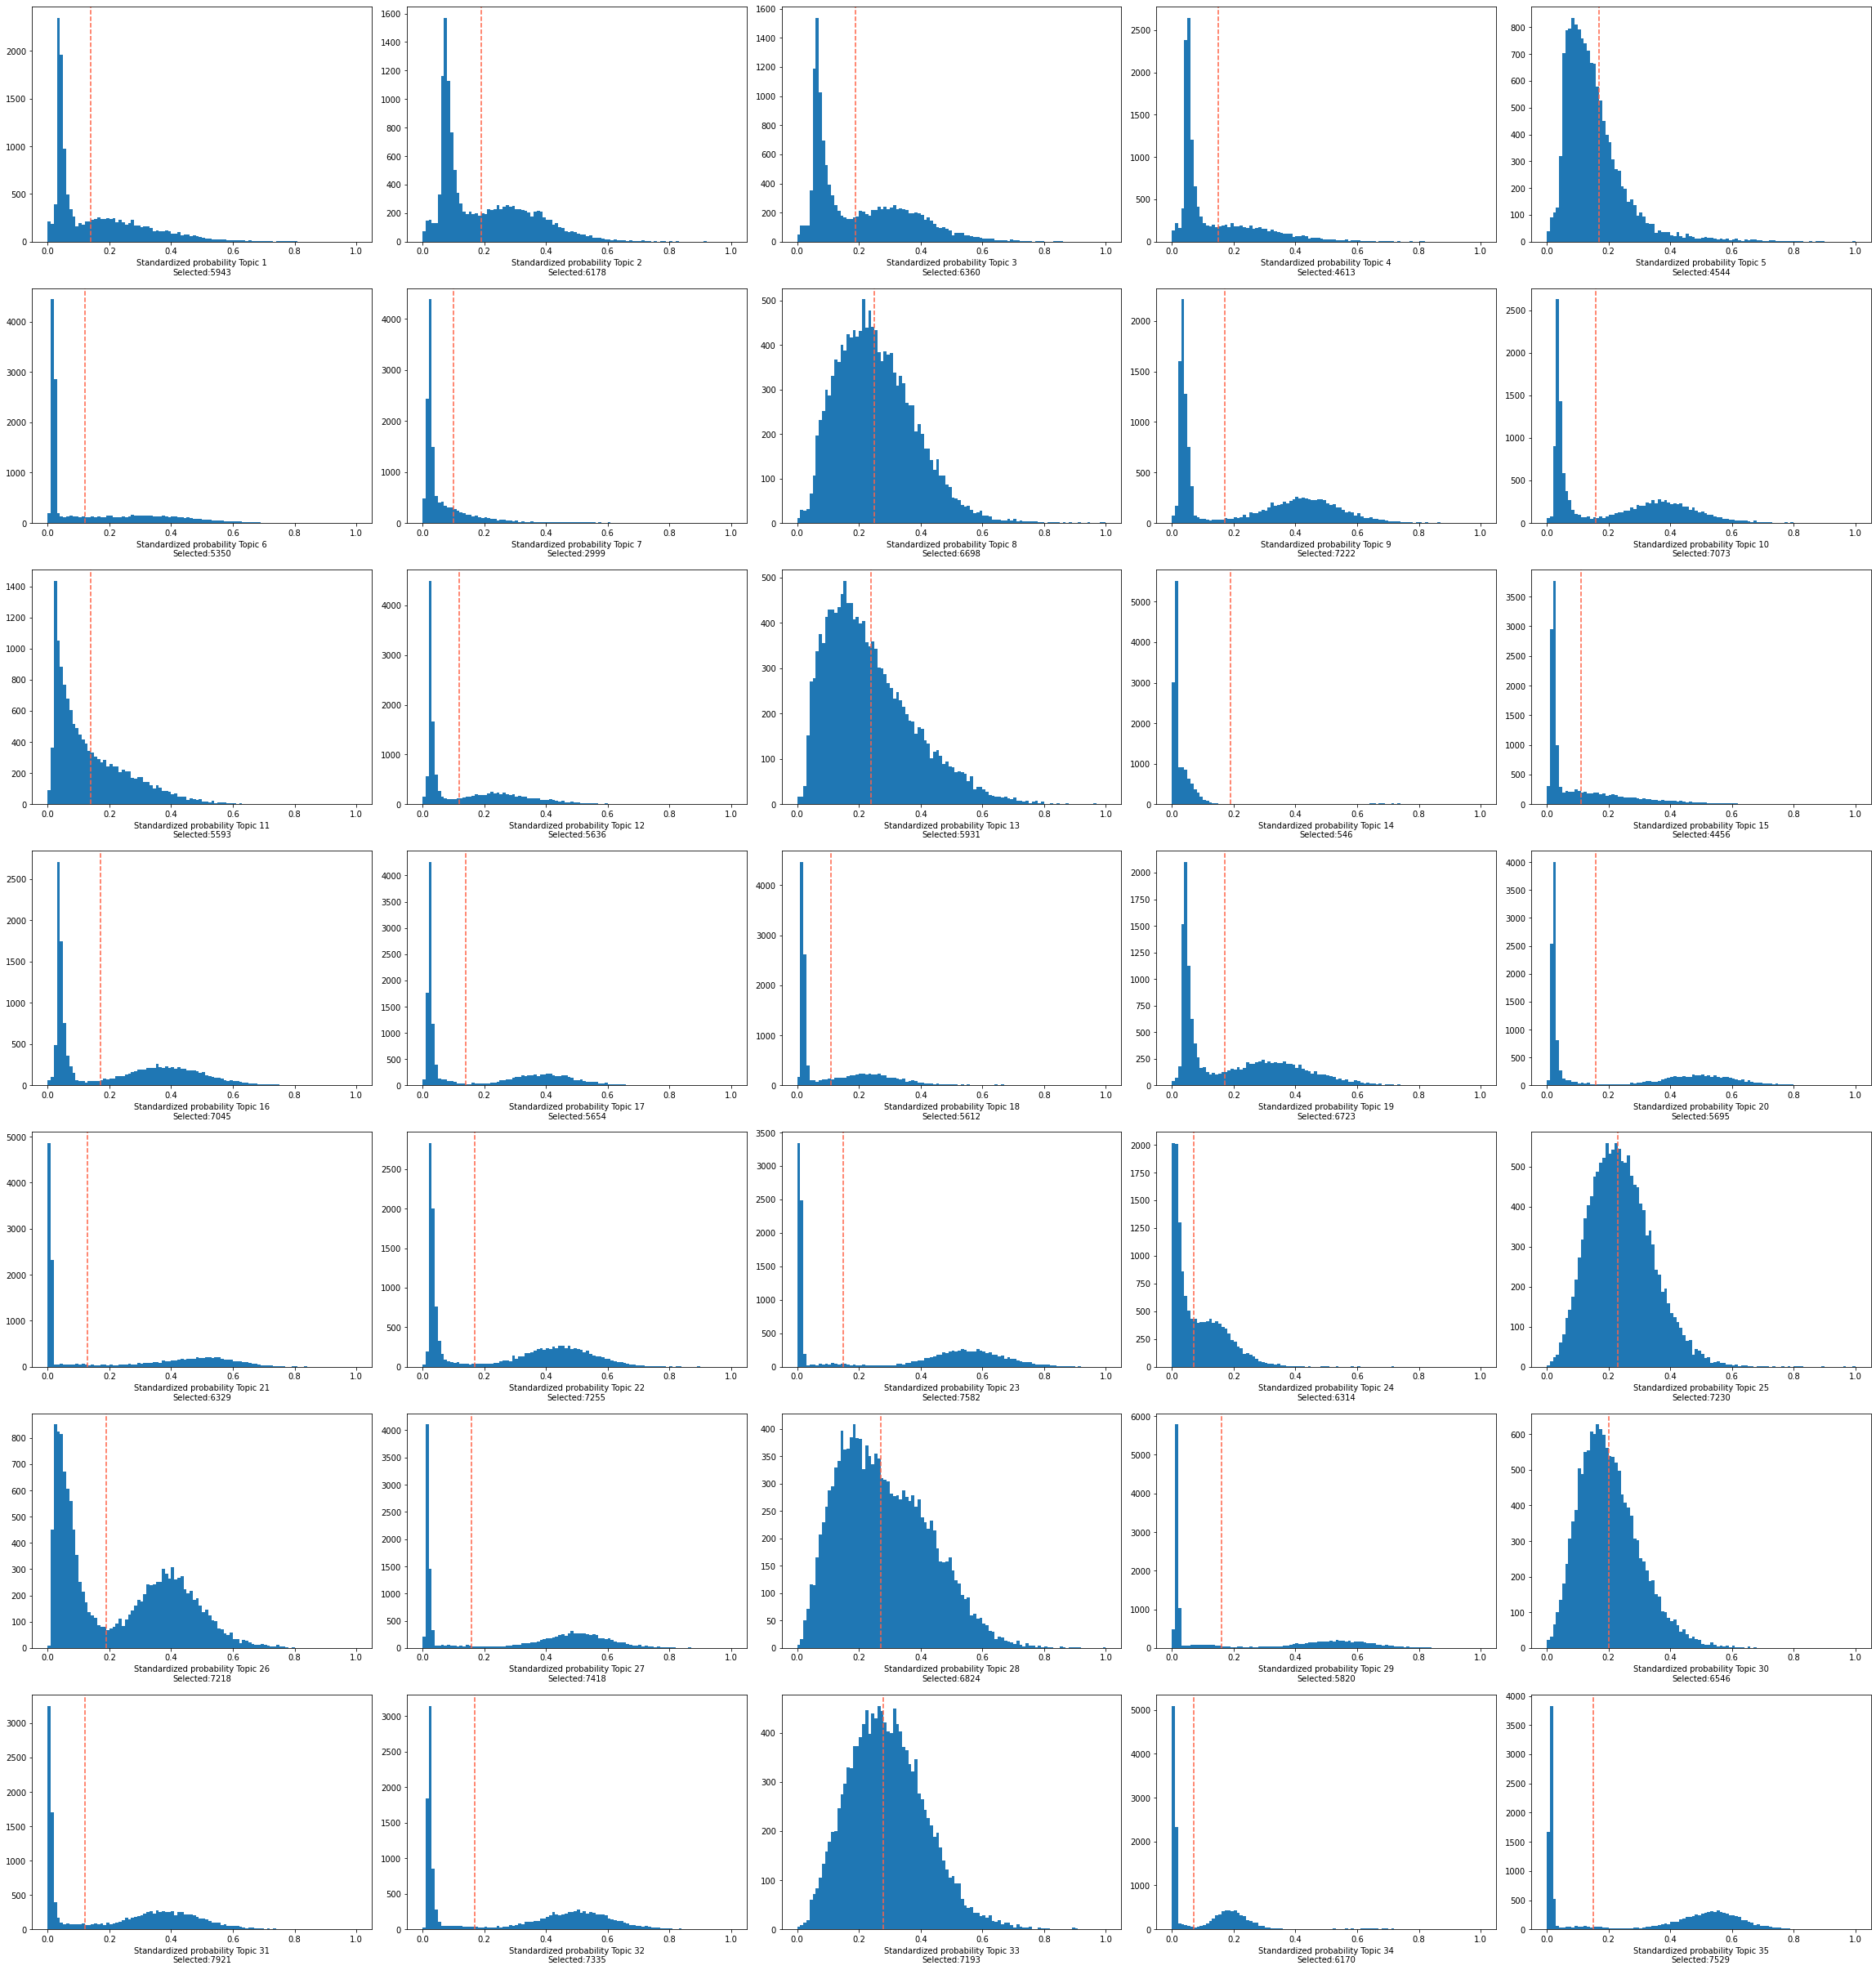

In [52]:
binarized_cell_topic = binarize_topics(cistopic_obj, target='cell', method='li', plot=True, num_columns=5, nbins=100)

Adjust thresholds manually???

Following, we can compute the topic quality control metrics. These include:

- **Number of assignments**
- **Topic coherence** (Mimno et al., 2011): Measures to which extent high scoring regions in the topic are actually co-accessible in the original data. If it is low it indicates that the topic is rather random. The higher, the better is a topic.
- **The marginal topic distribution**: Indicates how much each topic contributes to the model. The higher, the better is a topic.
- **The gini index**: Value between 0 and 1, that indicates the specificity of topics (0: General, 1:Specific)
- If topics have been binarized, the number of regions/cells per topic will be added.

In [53]:
from pycisTopic.topic_qc import *
topic_qc_metrics = compute_topic_metrics(cistopic_obj)

In [54]:
fig_dict={}
fig_dict['CoherenceVSAssignments']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Log10_Assignments', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['AssignmentsVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Log10_Assignments', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSRegions_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Regions_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSMarginal_dist']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Marginal_topic_dist', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSGini_index']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Gini_index', var_color='Gini_index', plot=False, return_fig=True)

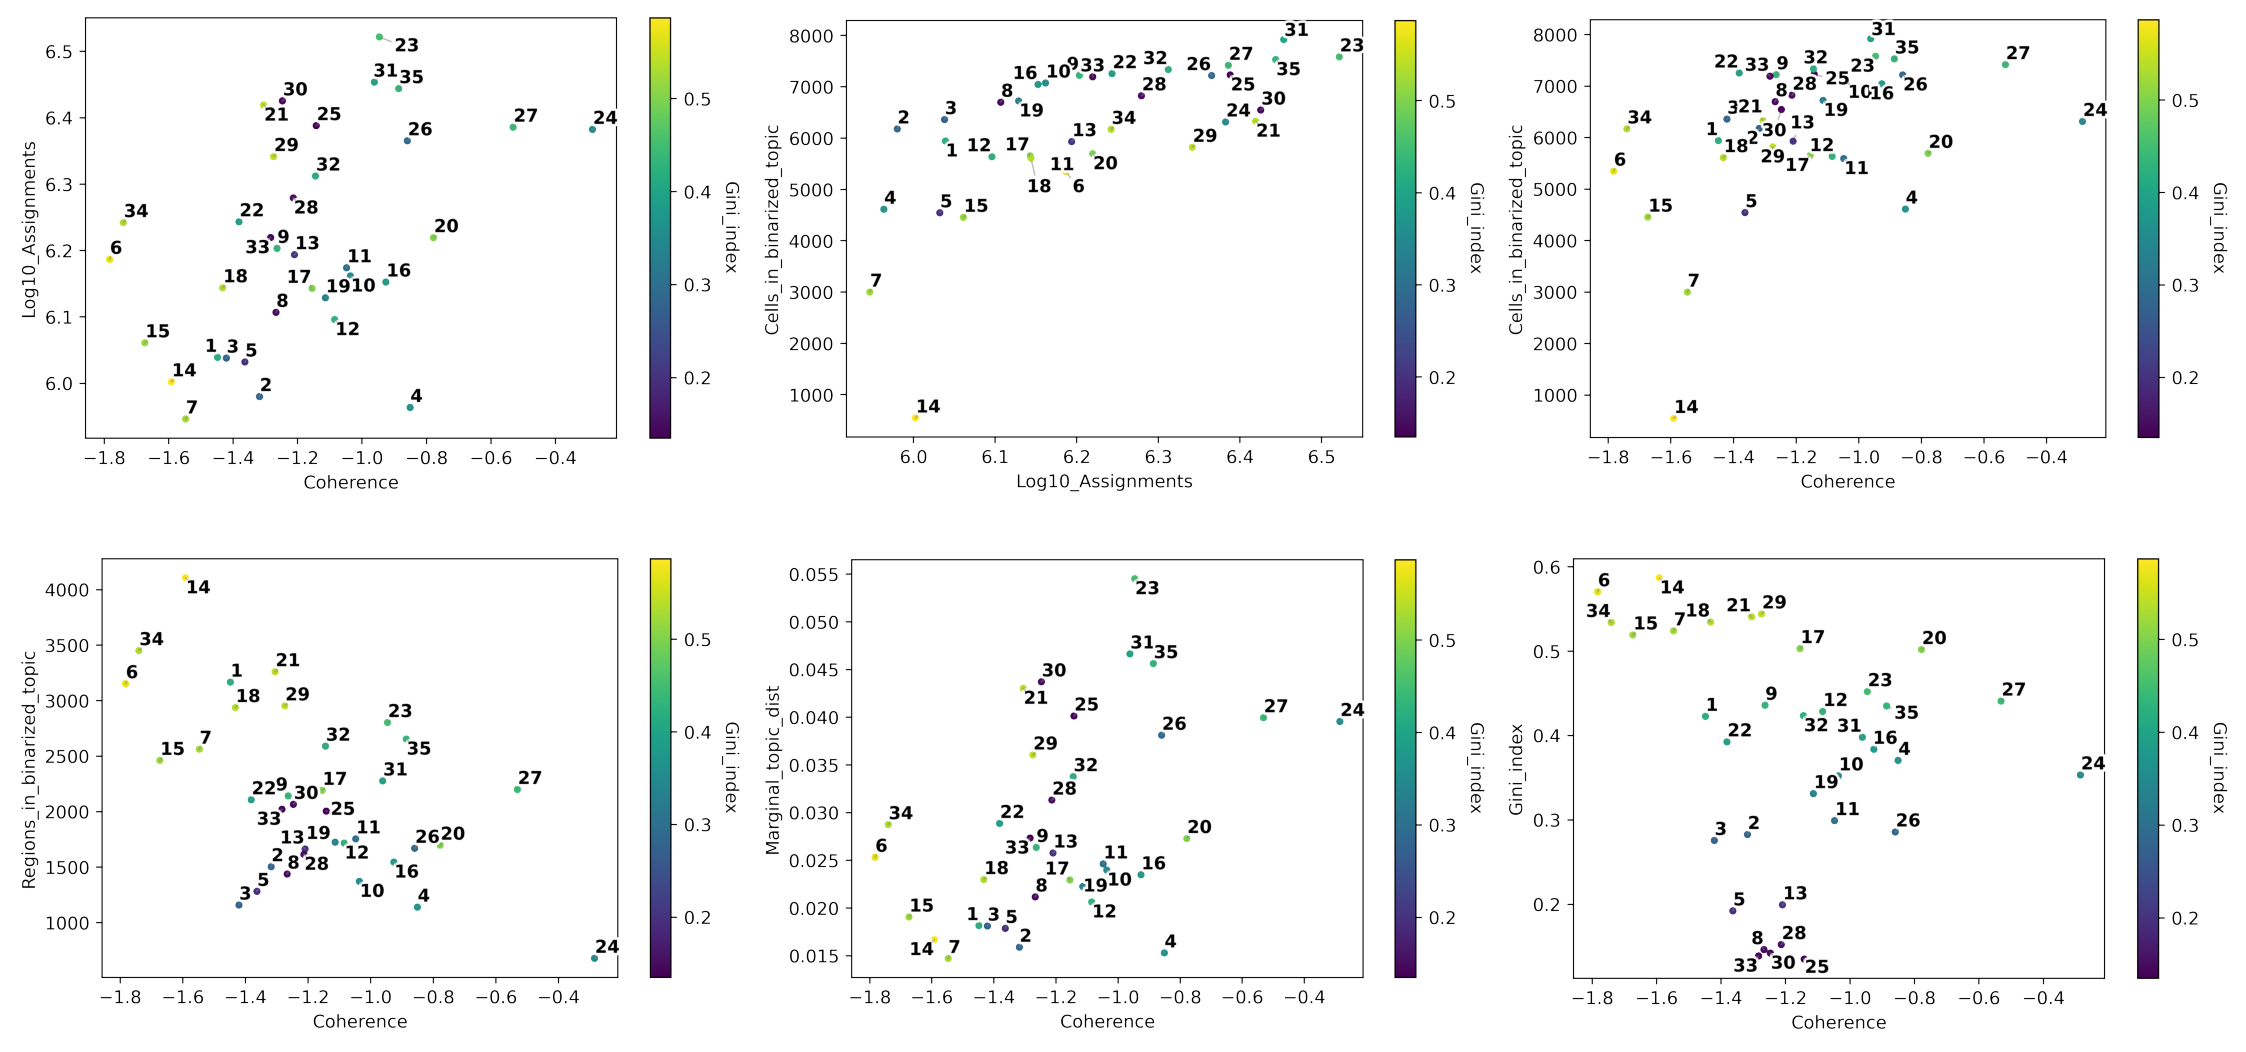

In [55]:
# Plot topic stats in one figure
fig=plt.figure(figsize=(40, 43))
i = 1
for fig_ in fig_dict.keys():
    plt.subplot(2, 3, i)
    img = fig2img(fig_dict[fig_]) #To convert figures to png to plot together, see .utils.py. This converts the figure to png.
    plt.imshow(img)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0, hspace=-0.70)
fig.savefig(outDir + 'topic_binarization/Topic_qc.pdf', bbox_inches='tight')
plt.show()

Good topic: high coherence + high number of assignment/maginal topic score (those two are correlated) + high gini index (= cell type specific)
- e.g. topic 20, 29, 21

Next, we can automatically annotate topics, in this case by cell type. Here we calculate the proportion of cells in each group that are assigned to the binarized topic in comparison to the ratio in the whole data set. We will consider a topic as general if the difference between the ration of cells in the whole data set in the binarized topic and the ratio of total cells in the assigned groups is above 0.2. This indicates that the topic is general, and the propotion test may fail if the topic is enriched in both foreground (the group) and background (the whole data set); resulting in a big difference between the ratios.

In [56]:
topic_annot = topic_annotation(cistopic_obj, annot_var='cell line', binarized_cell_topic=binarized_cell_topic, general_topic_thr = 0.2)

/opt/venv/lib/python3.8/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std


In [57]:
topic_annot.head()

cell line Ratio_cells_in_topic Ratio_group_in_population  \
Topic1           MCF7             0.422358                    0.4338   
Topic2           MCF7             0.439059                    0.4338   
Topic3           MCF7             0.451993                    0.4338   
Topic4  others, MM087             0.327837                    0.5662   
Topic5  others, MM087             0.322934                    0.5662   

        is_general  
Topic1       False  
Topic2       False  
Topic3       False  
Topic4       False  
Topic5       False

In [58]:
topic_qc_metrics = pd.concat([topic_annot[['cell line', 'Ratio_cells_in_topic', 'Ratio_group_in_population']], topic_qc_metrics], axis=1)

In [59]:
topic_qc_metrics.head()

cell line Ratio_cells_in_topic Ratio_group_in_population  \
Topic1           MCF7             0.422358                    0.4338   
Topic2           MCF7             0.439059                    0.4338   
Topic3           MCF7             0.451993                    0.4338   
Topic4  others, MM087             0.327837                    0.5662   
Topic5  others, MM087             0.322934                    0.5662   

        Log10_Assignments  Assignments  Regions_in_binarized_topic  \
Topic1           6.039101      1094211                        3167   
Topic2           5.980042       955084                        1504   
Topic3           6.038001      1091442                        1159   
Topic4           5.963631       919668                        1140   
Topic5           6.032187      1076929                        1282   

        Cells_in_binarized_topic  Coherence  Marginal_topic_dist  Gini_index  
Topic1                      5943  -1.448355             0.018162    0.422714  
Topic2                      6178  -1.318006             0.015892    0.282695  
Topic3                      6360  -1.420881             0.018114    0.275653  
Topic4                      4613  -0.850838             0.015298    0.370567  
Topic5                      4544  -1.363362             0.017867    0.192157

In [60]:
# Save
with open(outDir + 'topic_binarization/Topic_qc_metrics_annot.pkl', 'wb') as f:
    pickle.dump(topic_qc_metrics, f)
with open(outDir + 'topic_binarization/binarized_cell_topic.pkl', 'wb') as f:
    pickle.dump(binarized_cell_topic, f)
with open(outDir + 'topic_binarization/binarized_topic_region.pkl', 'wb') as f:
    pickle.dump(region_bin_topics, f)

## Differentially Accessible Regions (DARs)

In [3]:
# Load cisTopic object
import pickle
infile = open(outDir + 'CROP_multiome_cisTopicObject_noDBL.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

In [5]:
cistopic_obj.cell_data.head()

Unique_nr_frag  Dupl_rate  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            5935   0.127719   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            7747   0.130723   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi           22452   0.149126   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi           28284   0.186774   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi           17441   0.182057   

                                      cisTopic_nr_frag           barcode  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi             3013  ATTGCTCGTCACCAAA   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi             3877  GGCGTTATCAAAGGCA   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi             9438  TATCACAAGACAGGTA   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            16447  CCTGTTGGTGCGCATG   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi             9790  GTATTGCAGGTTAGAG   

                                       Total_nr_frag cisTopic_log_nr_frag  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi           6804             3.478999   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi           8912             3.588496   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi          26387              3.97488   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi          34780             4.216087   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi          21323             3.990783   

                                       Log_unique_nr_frag           sample_id  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            3.773421  CRM_CROP_seq_multi   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            3.889134  CRM_CROP_seq_multi   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi            4.351255  CRM_CROP_seq_multi   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            4.451541  CRM_CROP_seq_multi   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi            4.241571  CRM_CROP_seq_multi   

                                      cisTopic_log_nr_acc  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi            3.444669   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi            3.553762   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi            3.905742   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi            4.123688   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi            3.926754   

                                       Unique_nr_frag_in_regions  ...  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi                       3013  ...   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi                       3877  ...   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi                       9438  ...   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi                      16447  ...   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi                       9790  ...   

                                       Total_nr_frag_in_regions  orig.ident  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi                      3680         NaN   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi                      4778         NaN   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi                     12460         NaN   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi                     22172         NaN   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi                     13128         NaN   

                                      nCount_RNA  nFeature_RNA  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi        NaN           NaN   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi        NaN           NaN   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi        NaN           NaN   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi        NaN           NaN   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi        NaN           NaN   

                                       RNA_snn_res.0.4  seurat_clusters  \
ATTGCTCGTCACCAAA-1-CRM_CROP_seq_multi              NaN              NaN   
GGCGTTATCAAAGGCA-1-CRM_CROP_seq_multi              NaN              NaN   
TATCACAAGACAGGTA-1-CRM_CROP_seq_multi              NaN              NaN   
CCTGTTGGTGCGCATG-1-CRM_CROP_seq_multi              NaN              NaN   
GTATTGCAGGTTAGAG-1-CRM_CROP_seq_multi              NaN              NaN   

                                      pycisTopic_leiden_10_0.6  \
ATTGCTCGTCACCAAA-1-CRM_CROP_

In [143]:
from pycisTopic.diff_features import *
imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)

2022-04-04 16:48:46,376 cisTopic     INFO     Imputing drop-outs
2022-04-04 16:49:00,801 cisTopic     INFO     Scaling
2022-04-04 16:49:11,179 cisTopic     INFO     Keep non zero rows
2022-04-04 16:49:29,120 cisTopic     INFO     Imputed accessibility sparsity: 0.28598925889313453
2022-04-04 16:49:29,124 cisTopic     INFO     Create CistopicImputedFeatures object
2022-04-04 16:49:29,125 cisTopic     INFO     Done!


In [144]:
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)

2022-04-04 16:49:29,133 cisTopic     INFO     Normalizing imputed data
2022-04-04 16:50:32,548 cisTopic     INFO     Done!


2022-04-04 16:50:32,566 cisTopic     INFO     Calculating mean
2022-04-04 16:50:35,322 cisTopic     INFO     Calculating variance


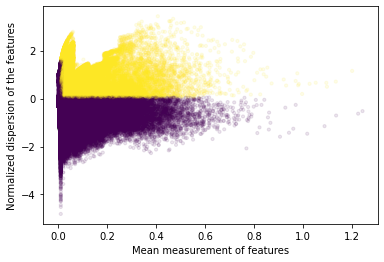

2022-04-04 16:51:14,161 cisTopic     INFO     Done!


In [145]:
variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                           min_disp = 0.05,
                                           min_mean = 0.0125, 
                                           max_mean = 3,
                                           max_disp = np.inf,
                                           n_bins=20, 
                                           n_top_features=None,
                                           plot=True,
                                           save= outDir + 'DARs/HVR_plot.pdf')

In [146]:
len(variable_regions)

63167

In [1]:
lines = variable_regions[0:10000]
new_lines = list()
for i, line in enumerate(lines):
    line = line.replace(":", "\t")
    line = line.replace("-", "\t")
    #print(line)
    new_lines.append('chr' + line)
    
new_lines[1:7]

NameError: name 'variable_regions' is not defined

In [163]:
#lines = variable_regions[0:10000]
with open(outDir + 'cisTarget_input.txt', 'w') as f:
    f.write('\n'.join(new_lines))

There are 63167 variable features

In [45]:
markers_dict= find_diff_features(cistopic_obj, 
                      imputed_acc_obj,
                      variable='cell line',
                      var_features=variable_regions,
                      contrasts=None,
                      adjpval_thr=0.05,
                      log2fc_thr=np.log2(1.5),
                      n_cpu=5,
                      _temp_dir='/tmp/',
                      split_pattern = '-') 

2022-03-23 15:35:18,798	INFO services.py:1412 -- View the Ray dashboard at http://127.0.0.1:8265


(markers_ray pid=13349) 2022-03-23 15:35:23,062 cisTopic     INFO     Formatting data for MCF7
(markers_ray pid=13350) 2022-03-23 15:35:23,061 cisTopic     INFO     Formatting data for MM087
(markers_ray pid=13346) 2022-03-23 15:35:23,064 cisTopic     INFO     Formatting data for others
(markers_ray pid=13346) 2022-03-23 15:35:43,851 cisTopic     INFO     Computing p-value for others
(markers_ray pid=13349) 2022-03-23 15:35:44,282 cisTopic     INFO     Computing p-value for MCF7
(markers_ray pid=13350) 2022-03-23 15:35:45,338 cisTopic     INFO     Computing p-value for MM087
(markers_ray pid=13349) 2022-03-23 15:37:01,172 cisTopic     INFO     Computing log2FC for MCF7
(markers_ray pid=13350) 2022-03-23 15:37:02,998 cisTopic     INFO     Computing log2FC for MM087
(markers_ray pid=13346) 2022-03-23 15:37:03,137 cisTopic     INFO     Computing log2FC for others
(markers_ray pid=13349) 2022-03-23 15:37:03,795 cisTopic     INFO     MCF7 done!
(markers_ray pid=13350) 2022-03-23 15:37:05,53

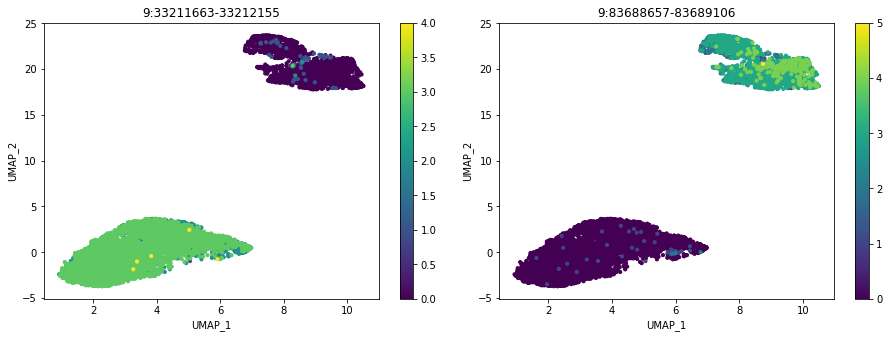

In [48]:
from pycisTopic.clust_vis import *
plot_imputed_features(cistopic_obj,
                    reduction_name='Seurat_RNA+ATAC_UMAP',
                    imputed_data=imputed_acc_obj,
                    features=[markers_dict[x].index.tolist()[0] for x in ['MCF7', 'MM087']],
                    scale=False,
                    num_columns=4,
                    selected_cells = cistopic_obj.projections['cell']['Seurat_RNA+ATAC_UMAP'].index.tolist(),
                    save= outDir + 'DARs/example_best_DARs.pdf')

How many DARs do we find per cell type?

In [49]:
x = [print(x + ': '+ str(len(markers_dict[x]))) for x in markers_dict.keys()]

MCF7: 27683
MM087: 34187
others: 32616


In [50]:
# Save
with open(outDir + 'DARs/Imputed_accessibility.pkl', 'wb') as f:
    pickle.dump(imputed_acc_obj, f)
with open(outDir + 'DARs/DARs.pkl', 'wb') as f:
    pickle.dump(markers_dict, f)

## Gene activity
After imputing region accessibility, we can infer gene accessibility. Next we need to retrieve gene annotation and chromosome sizes for our genome.

In [86]:
# Get TSS annotations
import pybiomart as pbm
import pyranges as pr
# For mouse
#dataset = pbm.Dataset(name='mmusculus_gene_ensembl',  host='http://www.ensembl.org')
# For human
dataset = pbm.Dataset(name='hsapiens_gene_ensembl',  host='http://www.ensembl.org')
# For fly
#dataset = pbm.Dataset(name='dmelanogaster_gene_ensembl',  host='http://www.ensembl.org')
annot = dataset.query(attributes=['chromosome_name', 'start_position', 'end_position', 'strand', 'external_gene_name', 'transcription_start_site', 'transcript_biotype'])
annot['Chromosome/scaffold name'] = 'chr' + annot['Chromosome/scaffold name'].astype(str)
annot.columns=['Chromosome', 'Start', 'End', 'Strand', 'Gene','Transcription_Start_Site', 'Transcript_type']
annot = annot[annot.Transcript_type == 'protein_coding']
annot.Strand[annot.Strand == 1] = '+'
annot.Strand[annot.Strand == -1] = '-'

# get rid of chr
annot['Chromosome'] = annot['Chromosome'].apply(lambda x: x.replace('chr',''))

pr_annotation = pr.PyRanges(annot.dropna(axis = 0))

/opt/venv/lib/python3.8/site-packages/pybiomart/dataset.py:269: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv(StringIO(response.text), sep='\t')


In [91]:
# Get chromosome sizes
import pandas as pd
import requests
target_url='http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes'
chromsizes=pd.read_csv(target_url, sep='\t', header=None)
chromsizes.columns=['Chromosome', 'End']
chromsizes['Start']=[0]*chromsizes.shape[0]
chromsizes=chromsizes.loc[:,['Chromosome', 'Start', 'End']]

# get rid of chr
chromsizes['Chromosome'] = chromsizes['Chromosome'].apply(lambda x: x.replace('chr',''))

chromsizes=pr.PyRanges(chromsizes)

Now we can infer gene activity. In this function there are several options to evaluate:

- **Search space**: The user can choose whether the search space should be include other genes or not (use_gene_boundaries), and the minimum and maximum distance it should have (upstream and downstream)
- **Distance weight**: The parameters related to the distance weight measure the impact of distance when inferring region to gene weights as an exponential function. The user can control whether this weight should be used (distance_weight) and the effect of the distance (decay_rate).
- **Gene size weight**: Large genes may have more peaks by chance. The user can optionally apply a weight based on the size of each gene (gene_size_weight), which by default is dividing the size of each gene by the median gene size in the genome. Alternatively, the user can also use average_scores which will calculate the gene activity as the mean weighted region accessibility of all regions linked to the gene.
- **Gini weight** : This weight will give more importance to specific regions (gini_weight).

In [93]:
from pycisTopic.gene_activity import *
gene_act, weigths = get_gene_activity(imputed_acc_obj, # Region-cell probabilities
                pr_annotation, # Gene annotation
                chromsizes, # Chromosome size
                use_gene_boundaries=True, # Whether to use the whole search space or stop when encountering another gene
                upstream=[1000, 100000], # Search space upstream. The minimum means that even if there is a gene right next to it 
                                      #these bp will be taken (1kbp here)
                downstream=[1000,100000], # Search space downstream
                distance_weight=True, # Whether to add a distance weight (an exponential function, the weight will decrease with distance)
                decay_rate=1, # Exponent for the distance exponential funciton (the higher the faster will be the decrease)
                extend_gene_body_upstream=10000, # Number of bp upstream immune to the distance weight (their value will be maximum for 
                                      #this weight)
                extend_gene_body_downstream=500, # Number of bp downstream immune to the distance weight
                gene_size_weight=False, # Whether to add a weights based on the length of the gene
                gene_size_scale_factor='median', # Dividend to calculate the gene size weigth. Default is the median value of all genes
                                      #in the genome
                remove_promoters=False, # Whether to remove promoters when computing gene activity scores
                average_scores=True, # Whether to divide by the total number of region assigned to a gene when calculating the gene 
                                      #activity score
                scale_factor=1, # Value to multiply for the final gene activity matrix
                extend_tss=[10,10], # Space to consider a promoter
                gini_weight = True, # Whether to add a gini index weigth. The more unique the region is, the higher this weight will be
                return_weights= True, # Whether to return the final weights
                project='Gene_activity') # Project name for the gene activity object

2022-03-23 16:36:05,830 cisTopic     INFO     Calculating gene boundaries
2022-03-23 16:36:15,626 cisTopic     INFO     Calculating distances


join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


2022-03-23 16:36:31,606 cisTopic     INFO     Calculating distance weigths
2022-03-23 16:36:32,300 cisTopic     INFO     Distance weights done
2022-03-23 16:36:32,301 cisTopic     INFO     Calculating gini weights
2022-03-23 16:37:22,723 cisTopic     INFO     Getting gene activity scores
2022-03-23 16:41:59,251 cisTopic     INFO     Creating imputed features object


In [102]:
ray.shutdown()

As we did before for the imputed region accessibility, we can also infer the Differentially Accessible Genes (DAGs).

In [135]:
markers_dict= find_diff_features(cistopic_obj, 
                      gene_act,
                      variable='cell line',
                      var_features=None,
                      contrasts=[[['MCF7'], ['MM087']], [['MM087'],['MCF7']]],
                      adjpval_thr=0.05,
                      log2fc_thr=np.log2(1.5),
                      n_cpu=1,
                      _temp_dir='tmp/ray_spill',
                      split_pattern = '-') 

2022-03-23 17:08:14,943 cisTopic     INFO     Formatting data for MCF7_VS_MM087
2022-03-23 17:08:16,813 cisTopic     INFO     Computing p-value for MCF7_VS_MM087
2022-03-23 17:08:39,472 cisTopic     INFO     Computing log2FC for MCF7_VS_MM087
2022-03-23 17:08:40,010 cisTopic     INFO     MCF7_VS_MM087 done!
2022-03-23 17:08:40,023 cisTopic     INFO     Formatting data for MM087_VS_MCF7
2022-03-23 17:08:41,867 cisTopic     INFO     Computing p-value for MM087_VS_MCF7
2022-03-23 17:09:02,528 cisTopic     INFO     Computing log2FC for MM087_VS_MCF7
2022-03-23 17:09:03,076 cisTopic     INFO     MM087_VS_MCF7 done!


In [137]:
markers_dict['MCF7_VS_MM087'].head(20)

Log2FC Adjusted_pval       Contrast
KCNK4     41.385482           0.0  MCF7_VS_MM087
CATSPERZ  41.385482           0.0  MCF7_VS_MM087
YWHAG     41.352377           0.0  MCF7_VS_MM087
HKDC1     41.302612           0.0  MCF7_VS_MM087
ZNF419    41.291075           0.0  MCF7_VS_MM087
ZNF772    41.239114           0.0  MCF7_VS_MM087
TGM1      40.683533           0.0  MCF7_VS_MM087
CSN3      40.534311           0.0  MCF7_VS_MM087
MAGEA9B   40.030713           0.0  MCF7_VS_MM087
SGSM2     39.861321           0.0  MCF7_VS_MM087
HSFX2     39.430256           0.0  MCF7_VS_MM087
COL9A1    39.412299           0.0  MCF7_VS_MM087
OR11H2    39.379388           0.0  MCF7_VS_MM087
PIRT      39.358538           0.0  MCF7_VS_MM087
CABS1     39.309677           0.0  MCF7_VS_MM087
H2AC19    38.471589           0.0  MCF7_VS_MM087
H2AC18    38.471589           0.0  MCF7_VS_MM087
CCR9      38.458574           0.0  MCF7_VS_MM087
TIMM23B   38.448737           0.0  MCF7_VS_MM087
LRRC24    38.225189           0.0  MCF7_VS_MM087

In [138]:
markers_dict['MM087_VS_MCF7'].head(20)

Log2FC Adjusted_pval       Contrast
CNTNAP3    40.510463           0.0  MM087_VS_MCF7
SSC4D      40.377207           0.0  MM087_VS_MCF7
SCRG1      37.262687           0.0  MM087_VS_MCF7
CT47A12    37.235401           0.0  MM087_VS_MCF7
AASS       36.915601           0.0  MM087_VS_MCF7
SS18       34.968301      0.000001  MM087_VS_MCF7
INPP5J     12.432795           0.0  MM087_VS_MCF7
ABCA1      11.541812           0.0  MM087_VS_MCF7
NIPSNAP3B  11.541812           0.0  MM087_VS_MCF7
EVI2B       11.51318           0.0  MM087_VS_MCF7
KANSL3     10.046904           0.0  MM087_VS_MCF7
ARID5A     10.046904           0.0  MM087_VS_MCF7
SARM1      10.023677           0.0  MM087_VS_MCF7
VTN        10.023677           0.0  MM087_VS_MCF7
RNASE9     10.019015           0.0  MM087_VS_MCF7
RNASE10    10.019015           0.0  MM087_VS_MCF7
OR8H2       9.946734           0.0  MM087_VS_MCF7
OR8I2       9.946734           0.0  MM087_VS_MCF7
CCDC163     9.658214           0.0  MM087_VS_MCF7
ZSWIM7       9.48798           0.0  MM087_VS_MCF7

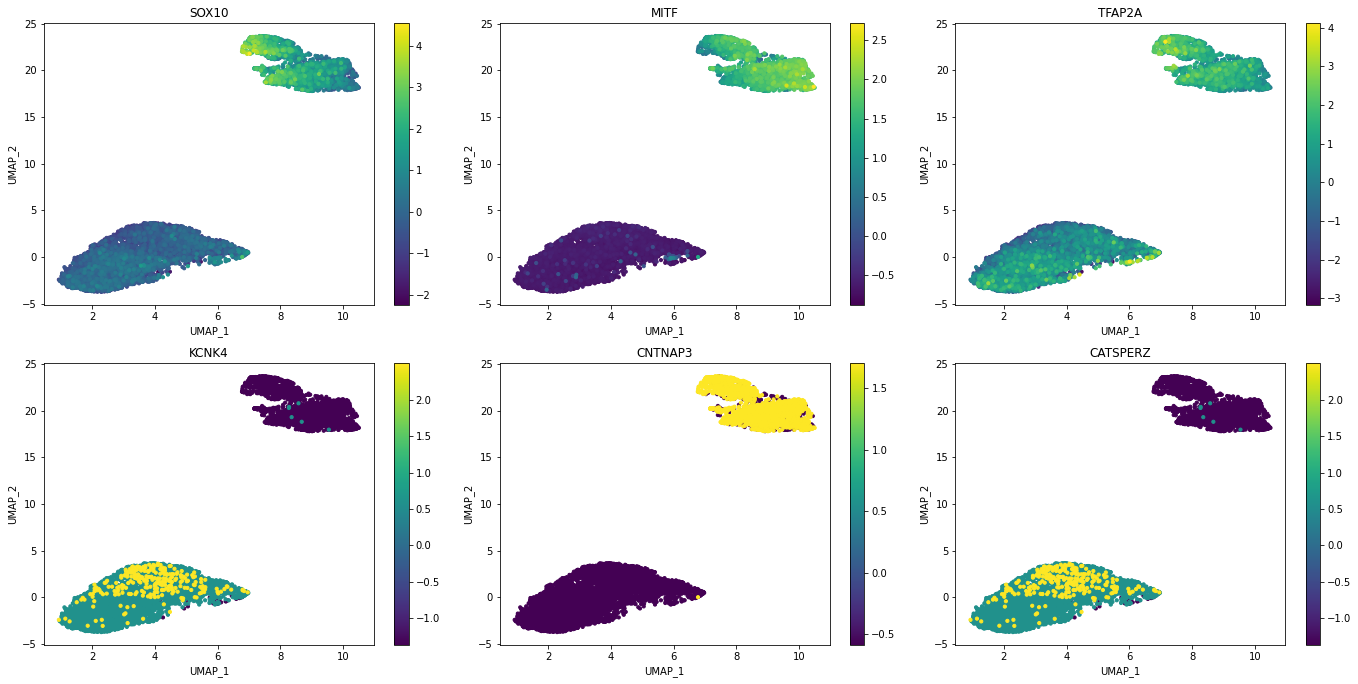

In [139]:
from pycisTopic.clust_vis import *
plot_imputed_features(cistopic_obj,
                    reduction_name='Seurat_RNA+ATAC_UMAP',
                    imputed_data=gene_act,
                    features=['SOX10', 'MITF', 'TFAP2A', 'KCNK4', 'CNTNAP3', 'CATSPERZ'],
                    scale=True,
                    num_columns=3,
                    save= outDir + 'DAGs/example_DAGs.pdf')

In [140]:
x = [print(x + ': '+ str(len(markers_dict[x]))) for x in markers_dict.keys()]

MCF7_VS_MM087: 5560
MM087_VS_MCF7: 4871


In [141]:
# Save
with open(outDir + 'DAGs/Gene_activity.pkl', 'wb') as f:
    pickle.dump(gene_act, f)
with open(outDir + 'DAGs/DAGs.pkl', 'wb') as f:
    pickle.dump(markers_dict, f)

## Exporting to loom

In [4]:
# Load cisTopic object
import pickle
infile = open(outDir + 'CROP_multiome_cisTopicObject_noDBL.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Load imputed accessibility
import pickle
infile = open(outDir + 'DARs/Imputed_accessibility.pkl', 'rb') #Here I am using pycisTopic gene activity matrix, but could be any :)
imputed_acc_obj = pickle.load(infile)
infile.close()
# Load region binarized topics
import pickle
infile = open(outDir + 'topic_binarization/binarized_topic_region.pkl', 'rb') #Here I am using pycisTopic gene activity matrix, but could be any :)
binarized_topic_region = pickle.load(infile)
infile.close()
# Load cell binarized topics
import pickle
infile = open(outDir + 'topic_binarization/binarized_cell_topic.pkl', 'rb') #Here I am using pycisTopic gene activity matrix, but could be any :)
binarized_cell_topic = pickle.load(infile)
infile.close()


In [5]:
# Load DARs
import pickle
infile = open(outDir + 'DARs/DARs.pkl', 'rb')
DARs_dict = pickle.load(infile)
infile.close()

### Export region accessibility

In [6]:
# Prepare DARs dict
cluster_markers = {'cell line': DARs_dict}
# Export to loom
from pycisTopic.loom import *
export_region_accessibility_to_loom(accessibility_matrix = imputed_acc_obj,
                  cistopic_obj = cistopic_obj, 
                  binarized_topic_region = binarized_topic_region,
                  binarized_cell_topic = binarized_cell_topic,
                  selected_cells = cistopic_obj.projections['cell']['Seurat_RNA+ATAC_UMAP'].index.tolist(),
                  out_fname = outDir + 'loom/CROP_multiome_pycisTopic_region_accessibility.loom',
                  cluster_annotation = ['cell line'],
                  cluster_markers = cluster_markers,
                  tree_structure = ('CROP_multiome', 'pycisTopic', 'noDBL_all'),
                  title = 'CROP multiome - Region accessibility all',
                  nomenclature = "hg38",
                  split_pattern = '-')   

2022-03-25 15:12:05,343 cisTopic     INFO     Creating minimal loom
2022-03-25 15:15:40,859 cisTopic     INFO     Adding annotations
2022-03-25 15:16:38,157 cisTopic     INFO     Adding clusterings
2022-03-25 15:16:38,210 cisTopic     INFO     Adding markers
2022-03-25 15:16:39,790 cisTopic     INFO     Exporting


/opt/venv/lib/python3.8/site-packages/loomxpy/loomxpy.py:459: FutureWarning: The default value of regex will change from True to False in a future version.
  regulons.columns = regulons.columns.str.replace("_?\\(", "_(")
/opt/venv/lib/python3.8/site-packages/loomxpy/loomxpy.py:437: FutureWarning: The default value of regex will change from True to False in a future version.
  regulons.columns = regulons.columns.str.replace("_?\\(", "_(")
